In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

<div>
<img src="https://raw.githubusercontent.com/NirAvrahamoff/NProject/main/DALL%C2%B7E%202024-06-18%2013.32.43%20-%20three%20baristas%20at%20a%20bar%2C%20two%20men%20and%20one%20woman%2C%20modern%20bar%20setting%2C%20baristas%20working%20together%2C%20stylish%20uniforms%2C%20coffee%20equipment%20in%20the%20background%2C%20w.webp" width="400"/>
</div>

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/NirAvrahamoff/NProject/main/Coffee_Chain_Sales%20.csv")
df = df.copy()
df

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [3]:
df.shape

(1062, 21)

In [4]:
df.columns

Index(['Area Code', 'Cogs', 'DifferenceBetweenActualandTargetProfit', 'Date',
       'Inventory Margin', 'Margin', 'Market_size', 'Market', 'Marketing',
       'Product_line', 'Product_type', 'Product', 'Profit', 'Sales', 'State',
       'Target_cogs', 'Target_margin', 'Target_profit', 'Target_sales ',
       'Total_expenses', 'Type'],
      dtype='object')

In [5]:
df.dtypes

Area Code                                  int64
Cogs                                       int64
DifferenceBetweenActualandTargetProfit     int64
Date                                      object
Inventory Margin                           int64
Margin                                     int64
Market_size                               object
Market                                    object
Marketing                                  int64
Product_line                              object
Product_type                              object
Product                                   object
Profit                                     int64
Sales                                      int64
State                                     object
Target_cogs                                int64
Target_margin                              int64
Target_profit                              int64
Target_sales                               int64
Total_expenses                             int64
Type                

In [6]:
df.isnull().sum().sort_values()
#Missing values

Area Code                                 0
Target_sales                              0
Target_profit                             0
Target_margin                             0
Target_cogs                               0
State                                     0
Sales                                     0
Profit                                    0
Product                                   0
Total_expenses                            0
Product_type                              0
Marketing                                 0
Market                                    0
Market_size                               0
Margin                                    0
Inventory Margin                          0
Date                                      0
DifferenceBetweenActualandTargetProfit    0
Cogs                                      0
Product_line                              0
Type                                      0
dtype: int64

In [7]:
df.describe()

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Inventory Margin,Margin,Marketing,Profit,Sales,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses
count,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,587.030132,82.399247,0.387006,815.175141,102.423729,30.433145,60.556497,191.049906,71.676083,96.817326,60.169492,168.493409,53.836158
std,225.299162,64.824295,44.331180,916.156386,91.286704,25.963448,100.516593,148.270317,65.701583,89.467176,77.824869,145.955171,31.703526
min,203.000000,0.000000,-369.000000,-3534.000000,-294.000000,0.000000,-605.000000,21.000000,0.000000,-210.000000,-320.000000,0.000000,11.000000
25%,425.000000,41.000000,-15.000000,447.000000,51.000000,13.000000,16.250000,98.000000,30.000000,50.000000,20.000000,80.000000,33.000000
50%,573.000000,57.000000,-3.000000,659.000000,73.000000,22.000000,39.500000,133.000000,50.000000,70.000000,40.000000,120.000000,46.000000
75%,774.000000,101.000000,13.000000,968.000000,130.000000,40.750000,87.000000,227.000000,90.000000,120.000000,80.000000,210.000000,66.000000
max,985.000000,294.000000,249.000000,8252.000000,526.000000,122.000000,646.000000,815.000000,380.000000,580.000000,470.000000,960.000000,156.000000


# EDA PROJECT
<ul>
<li>outliers</li>
<li>EDA</li>
</ul>

# Table of Contents

1. [Date](#Subject1)
   1. [Marketing and Sales](#Subject1.1)
2. [Popular and Profitable Products and Regions](#Subject2)
3. [TARGET vs WHAT IS ACTUALLY HAPPENING](#Subject3)


---
### function in use

In [102]:
def plot_correlation_heatmap(df, columns, method):
    correlation_data = df[columns].dropna()
    correlation_matrix = correlation_data.corr(method=method)
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap ({method.capitalize()} Method)')
    plt.show()
    
# def plot_violin(df, x_col, y_col):
#     plt.figure(figsize=(15, 10))
#     sns.violinplot(x=x_col, y=y_col, data=df)
#     plt.title(f'Violin Plot of {y_col} by {x_col}')
#     plt.xlabel(x_col)
#     plt.ylabel(y_col)
#     plt.show()

# def plot_regplot(df, x_col, y_col):
#     filtered_data = df.dropna(subset=[x_col, y_col])
#     plt.figure(figsize=(10, 6))
#     sns.regplot(data=filtered_data, x=x_col, y=y_col)
#     plt.title(f'Relationship between {y_col} by {x_col}')
#     plt.xlabel(x_col)
#     plt.ylabel(y_col)
#     plt.show()
    
# def plot_by_category(df, category_column, target_column):
    # survival_data = df.groupby(category_column)[target_column].value_counts(normalize=True).unstack() * 100
    # survival_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])
    # plt.title(f'{target_column} Percentages by {category_column}')
    # plt.xlabel(category_column.capitalize())
    # plt.ylabel('Percentage')
    # plt.legend(title=target_column.capitalize(), labels=['0', '1'])
    # plt.xticks(rotation=0)
    # plt.show()
    
# def plot_numeric_vs_categorical(data, numeric_column, categorical_column):
#     plt.figure(figsize=(12, 8))
#     sns.boxplot(x=categorical_column, y=numeric_column, data=data)
#     plt.title(f'Boxplot of {numeric_column} by {categorical_column}')
#     plt.xlabel(categorical_column)
#     plt.ylabel(numeric_column)
#     plt.xticks(rotation=45) 
#     plt.show()
    
# def plot_histogram_with_kde(df, column_name):
#     plt.figure(figsize=(10, 6))
#     sns.histplot(data=df, x=column_name, bins=30, kde=True)
#     plt.title(f'Distribution of {column_name.capitalize()}')
#     plt.xlabel(column_name.capitalize())
#     plt.ylabel('Frequency')
#     plt.show()
    
# def plot_numeric_columns(data, numeric_columns):
#     num_columns = len(numeric_columns)
#     num_rows = num_columns
#     fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
#     for idx, column in enumerate(numeric_columns):
#         row = idx
#         sns.violinplot(y=data[column], ax=axes[row, 0])
#         axes[row, 0].set_title(f'Violin plot of {column}')
#         sns.boxplot(y=data[column], ax=axes[row, 1])
#         axes[row, 1].set_title(f'Boxplot of {column}')
#     plt.tight_layout()
#     plt.show()

# def plot_numeric_by_category(data, numeric_column, category_column):
#     categories = data[category_column].unique()
    
#     for category in categories:
#         category_data = data[data[category_column] == category]
        
#         plt.figure(figsize=(8, 6))
#         sns.countplot(data=category_data, x=numeric_column)
#         plt.title(f'Count of {numeric_column} for {category} in {category_column}')
#         plt.xlabel(numeric_column)
#         plt.ylabel('Count')
#         plt.show()

def get_numeric_columns(data):
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
    return numeric_columns

def plot_values_by_time(df, column_name):
    df1 = df.copy()
    df1.set_index('Date', inplace=True)
    plt.figure(figsize=(10, 6))
    df1[column_name].plot()
    plt.title(f'{column_name} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.show()

def plot_category_counts_by_month(df, categorical_column):
    df1 = df.copy()
    df1.set_index('Date', inplace=True)

    # Group by the categorical column and resample by month, counting the occurrences
    monthly_counts = df1.groupby([categorical_column, pd.Grouper(freq='M')]).size().unstack(level=0)
    # Plot the data
    monthly_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title(f'Count of {categorical_column} Over Time')
    plt.xlabel('Month')
    plt.ylabel(f'Count of {categorical_column}')
    plt.xticks(rotation=45)
    plt.legend(title=categorical_column)
    plt.show()

def plot_category_sum_by_month(df, category_column):
    # Ensure the Date column is in datetime format using .loc to avoid SettingWithCopyWarning
    df.loc[:, 'Date'] = pd.to_datetime(df['Date'])
    
    # Group by month and category and calculate the sum for numeric columns only
    numeric_cols = df.select_dtypes(include=np.number).columns
    monthly_sum = df.groupby([df['Date'].dt.to_period('M'), category_column])[numeric_cols].sum().reset_index()
    monthly_sum['Date'] = monthly_sum['Date'].dt.to_timestamp()

    # Pivot the DataFrame to have categories as columns
    pivot_df = monthly_sum.pivot(index='Date', columns=category_column, values='Sales')
    
    # Define custom colors with primary colors as blue and orange
    base_colors = ['#1f77b4', '#ff7f0e']
    additional_colors = sns.color_palette("husl", len(pivot_df.columns) - len(base_colors))
    custom_colors = base_colors + additional_colors
    
    # Plot the result as a bar plot with custom colors
    pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), color=custom_colors)

    plt.title(f'Monthly Sales Sum by {category_column.capitalize()}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend(title=category_column)
    plt.show()

---
<a id='Subject1'></a>

## Date 
#### time column

### הצגה של עמודה מספרית לפי זמן

In [78]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

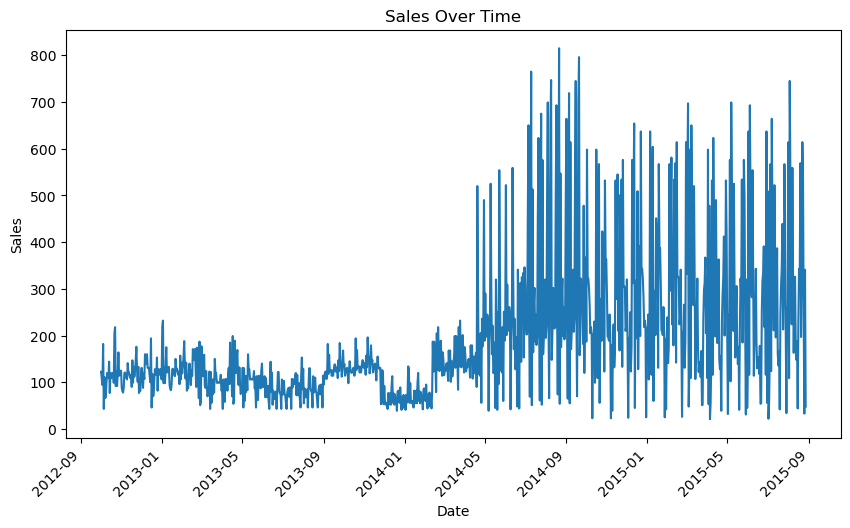

In [79]:
plot_values_by_time(df, 'Sales')

In [80]:
df_up_to_2014 = df[df['Date']> '2014-05-01']
df_up_to_2014

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Target_profit,Target_sales,Total_expenses,Type,YearMonth,Month,Profit Difference,Sales Difference,COGS Difference,Margin Difference
579,409,118,27,2014-05-02,930,172,Major Market,South,33,Beans,...,100,220,45,Regular,2014-05,2014-05,27,70,28,42
580,918,78,22,2014-05-03,798,119,Small Market,South,25,Beans,...,40,150,57,Decaf,2014-05,2014-05,22,47,18,29
581,918,88,-19,2014-05-04,561,112,Small Market,South,29,Beans,...,90,230,41,Regular,2014-05,2014-05,-19,-30,-12,-18
582,918,102,29,2014-05-05,-2003,143,Small Market,South,31,Beans,...,60,180,54,Regular,2014-05,2014-05,29,65,22,43
583,337,101,5,2014-05-06,552,130,Small Market,South,33,Leaves,...,80,210,45,Decaf,2014-05,2014-05,5,21,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,2015-08-23,1820,251,Small Market,West,70,Leaves,...,100,360,94,Regular,2015-08,2015-08,133,174,70,71
1058,971,88,48,2015-08-24,817,133,Small Market,West,29,Leaves,...,60,160,60,Regular,2015-08,2015-08,48,76,28,33
1059,775,294,-285,2015-08-25,8252,-294,Small Market,West,111,Leaves,...,-320,0,145,Regular,2015-08,2015-08,-285,33,84,-84
1060,503,134,80,2015-08-26,690,186,Small Market,West,41,Leaves,...,100,230,65,Regular,2015-08,2015-08,80,111,44,46


# כפי שניתן לראות יש שינוי משמעותי במכירות ממאי 2014

כעת נבחן מה קרה שגרם לשינוי המשמעותי הזה:
- האם הכניסו לרשת ליין מוצרים חדש?
- האם השיקו מוצר חדש כמו סוג חדש של קפה שנכנס לרשת?
- האם נכנסו לשווקים חדשים ופתחו חנויות במדינות חדשות שגרמו ליותר מכירות?
- האם השקיעו יותר כספים על שיווק?

נתחיל בבדיקה האם נכנס ליין מוצרים חדש:

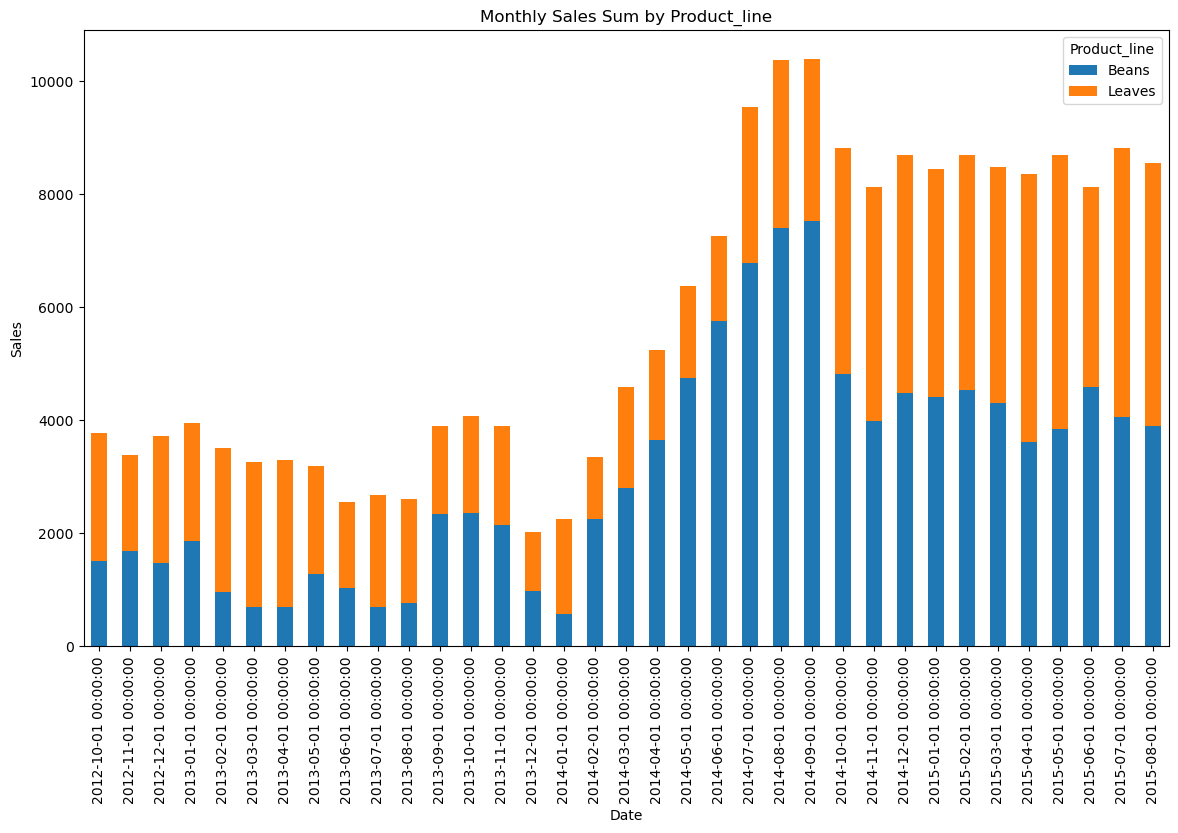

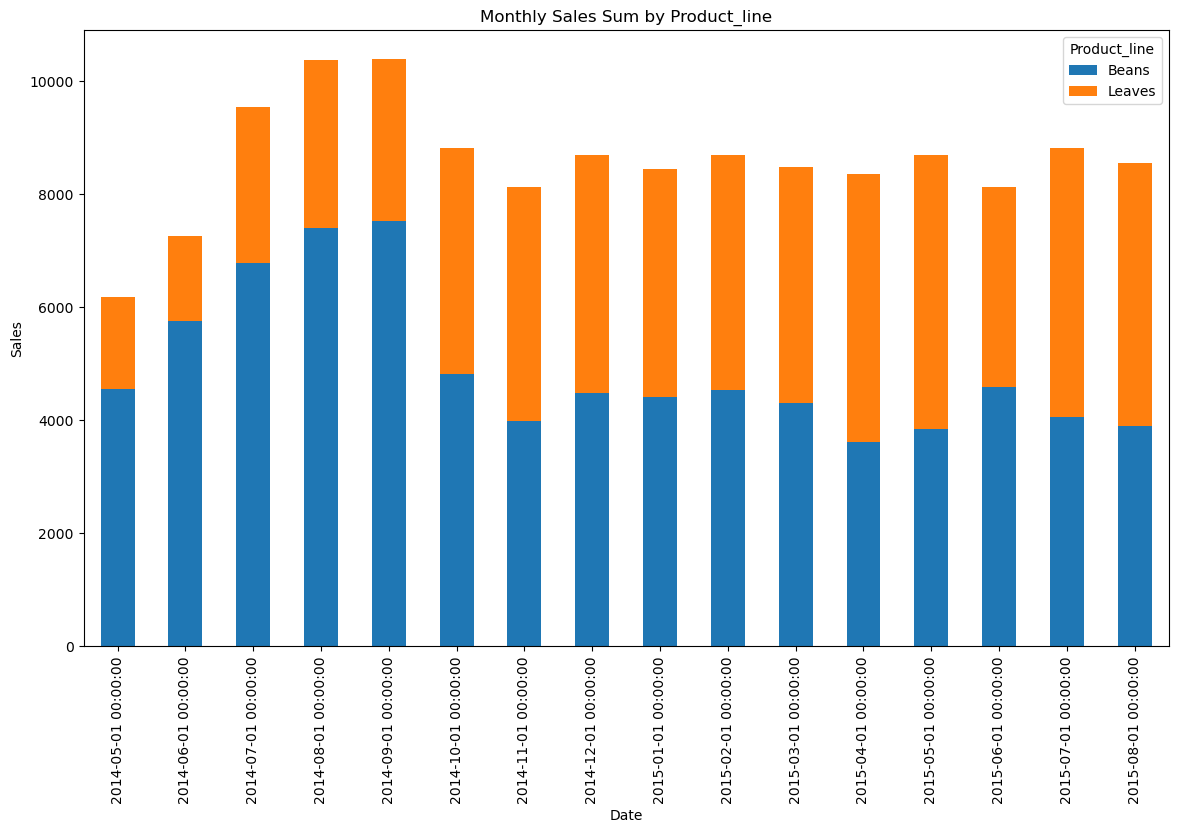

In [81]:
plot_category_sum_by_month(df, 'Product_line')
plot_category_sum_by_month(df_up_to_2014, 'Product_line')

In [82]:
product_lines_before_2014 = set(df[df['Date'] <= '2014-05-01']['Product_line'].unique())
product_lines_after_2014 = set(df_up_to_2014['Product_line'].unique())

# מציאת ליין המוצרים החדש
new_product_lines = product_lines_after_2014 - product_lines_before_2014

# הדפסת התוצאות
print("Product lines before May 2014:", product_lines_before_2014)
print("Product lines after May 2014:", product_lines_after_2014)
if new_product_lines:
    print("New product lines introduced after May 2014:", new_product_lines)
else:
    print("No new product lines introduced after May 2014.")

Product lines before May 2014: {'Leaves', 'Beans'}
Product lines after May 2014: {'Leaves', 'Beans'}
No new product lines introduced after May 2014.


כפי שניתן לראות לא נוצר ליין מוצרים חדש ברשת ולכן נעבור לבדיקה האם השיקו מוצר חדש ברשת, אולי השיקו איזה קפה חדש שהפך למאוד פופלרי וגרם לרווחיות גדולה

In [83]:
products = df['Product'].unique()
products

array(['Lemon', 'Mint', 'Darjeeling', 'Green Tea', 'Decaf Espresso',
       'Decaf Irish Cream', 'Amaretto', 'Colombian', 'Caffe Mocha',
       'Caffe Latte', 'Chamomile', 'Earl Grey', 'Regular Espresso'],
      dtype=object)

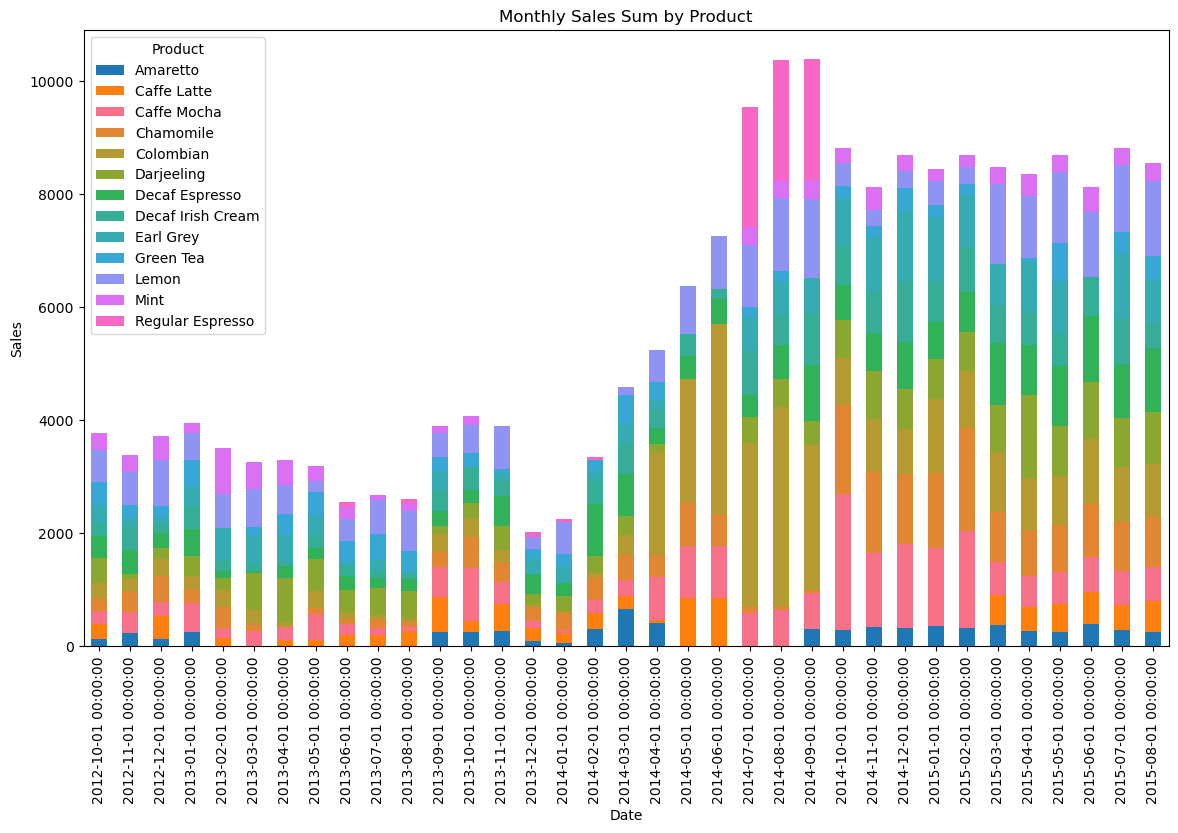

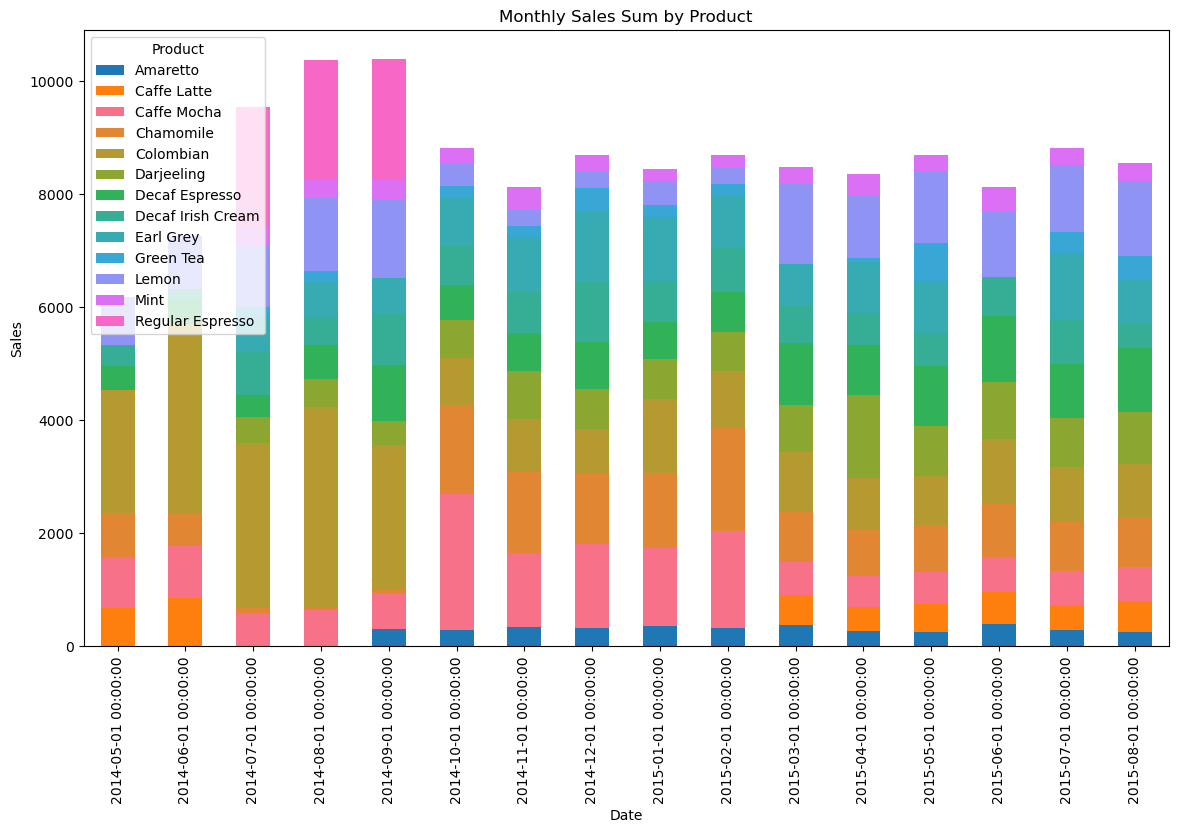

In [84]:
plot_category_sum_by_month(df, "Product")
# נבחן אם יש מוצרים ספציפיים עם שינוי משמעותי מ2014
plot_category_sum_by_month(df_up_to_2014, 'Product')

In [85]:

# השגת מוצרי הפרודקט לפני ואחרי מאי 2014
products_before_2014 = set(df[df['Date'] <= '2014-05-01']['Product'].unique())
products_after_2014 = set(df_up_to_2014['Product'].unique())

# מציאת המוצרים החדשים
new_products = products_after_2014 - products_before_2014

# הדפסת התוצאות
print("Products before May 2014:", products_before_2014)
print("Products after May 2014:", products_after_2014)
if new_products:
    print("New products introduced after May 2014:", new_products)
else:
    print("No new products introduced after May 2014.")


Products before May 2014: {'Caffe Mocha', 'Chamomile', 'Darjeeling', 'Regular Espresso', 'Caffe Latte', 'Green Tea', 'Decaf Espresso', 'Lemon', 'Amaretto', 'Colombian', 'Mint', 'Earl Grey', 'Decaf Irish Cream'}
Products after May 2014: {'Caffe Mocha', 'Chamomile', 'Darjeeling', 'Regular Espresso', 'Caffe Latte', 'Green Tea', 'Decaf Espresso', 'Lemon', 'Amaretto', 'Colombian', 'Mint', 'Earl Grey', 'Decaf Irish Cream'}
No new products introduced after May 2014.


גם מבחינת מוצרים לא השיקו שום מוצר חדש מאז 2014, אז גם זאת לא הסיבה לשינוי במכירות, כעת נבדוק האם פתחו חנויות במדינות חדשות כלומר נפתחו לשווקים חדשים

In [86]:
states_before_2014 = set(df[df['Date'] <= '2014-05-01']['State'].unique())
states_after_2014 = set(df_up_to_2014['State'].unique())

# מציאת המדינות החדשות
new_states = states_after_2014 - states_before_2014

# הדפסת התוצאות
print("States before May 2014:", states_before_2014)
print("States after May 2014:", states_after_2014)
if new_states:
    print("New states introduced after May 2014:", new_states)
else:
    print("No new states introduced after May 2014.")

States before May 2014: {'Ohio', 'Washington', 'Massachusetts', 'Wisconsin', 'Texas', 'New Hampshire', 'Utah', 'Nevada', 'Oregon', 'California', 'Oklahoma', 'Florida', 'Colorado', 'Iowa', 'New Mexico', 'Louisiana', 'Missouri', 'Illinois', 'New York', 'Connecticut'}
States after May 2014: {'Ohio', 'Massachusetts', 'Washington', 'Wisconsin', 'Texas', 'Utah', 'Nevada', 'Oregon', 'California', 'Oklahoma', 'Florida', 'Colorado', 'Iowa', 'New Mexico', 'Louisiana', 'Missouri', 'Illinois', 'New York', 'Connecticut'}
No new states introduced after May 2014.


# תת מסקנה
מפתיע למרות השינויים המאוד משמעותיים במכירות ניתן לראות שזה לא נגרם עקב כניסה לשווקים(מדינות) חדשות, לא עקב ליין מוצרים חדש ולא עקב השקת מוצרים חדשים.. 
לפי איך שזה נראה עד כה ככל הנראה הם עשו השקיעו כספים עבור שיווק אגרסיבי בשביל לקבל שינוי כזה משמעותי במכירות, בואו נבדוק זאת: 

<a id='Subject1.1'></a>

### Marketing and Sales

Is there a direct and significant relationship between every dollar spent on marketing and the resulting sales? Discover how strategic investments in marketing can drive substantial growth in sales and profitability.


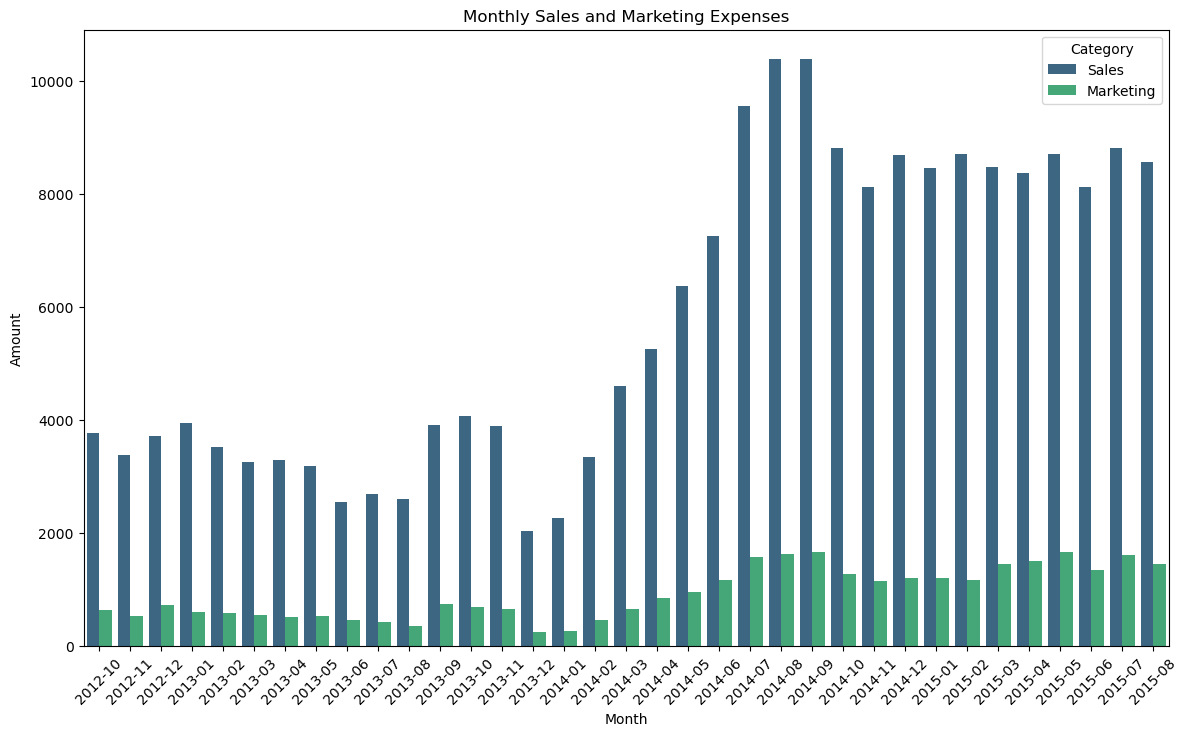

In [87]:
df['YearMonth'] = df['Date'].dt.to_period('M')

# חישוב סך המכירות וההוצאות על שיווק לפי חודשים
monthly_sales_marketing = df.groupby('YearMonth').agg({'Sales': 'sum', 'Marketing': 'sum'}).reset_index()

# המר את YearMonth לפורמט שניתן להציג בגרף
monthly_sales_marketing['YearMonth'] = monthly_sales_marketing['YearMonth'].astype(str)

# המרת הנתונים לפורמט ארוך לצורך יצירת גרף מוערם
monthly_sales_marketing_melted = monthly_sales_marketing.melt(id_vars='YearMonth', value_vars=['Sales', 'Marketing'], var_name='Category', value_name='Amount')

# ציור גרף עמודות מוערם
plt.figure(figsize=(14, 8))
sns.barplot(data=monthly_sales_marketing_melted, x='YearMonth', y='Amount', hue='Category', palette='viridis')
plt.title('Monthly Sales and Marketing Expenses')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

In [88]:
df_before_2014 = df[df['Date'] < '2014-05-01']

# חישוב ממוצע הוצאות שיווק חודשי לפני מאי 2014 ואחרי מאי 2014
monthly_avg_marketing_before_2014 = df_before_2014.resample('M', on='Date')['Marketing'].mean().mean()
monthly_avg_marketing_after_2014 = df_up_to_2014.resample('M', on='Date')['Marketing'].mean().mean()

# חישוב אחוז השינוי בממוצע ההוצאות השיווקיות החודשיות
percentage_change = ((monthly_avg_marketing_after_2014 - monthly_avg_marketing_before_2014) / monthly_avg_marketing_before_2014) * 100

print("Average monthly marketing expenses before May 2014:", monthly_avg_marketing_before_2014)
print("Average monthly marketing expenses after May 2014:", monthly_avg_marketing_after_2014)
print("Percentage change in average monthly marketing expenses:", percentage_change)


Average monthly marketing expenses before May 2014: 17.98952724553319
Average monthly marketing expenses after May 2014: 45.385682817033626
Percentage change in average monthly marketing expenses: 152.28946929832702


ניתן לראות שינוי משמעותי בהוצאות השיווקיות החודשיות, בממוצע חודשי רשת בית הקפה השקיעה 152% יותר ממה שהשקיעה על שיווק ממאי 2014.

Correlation between Sales and Marketing: 0.97


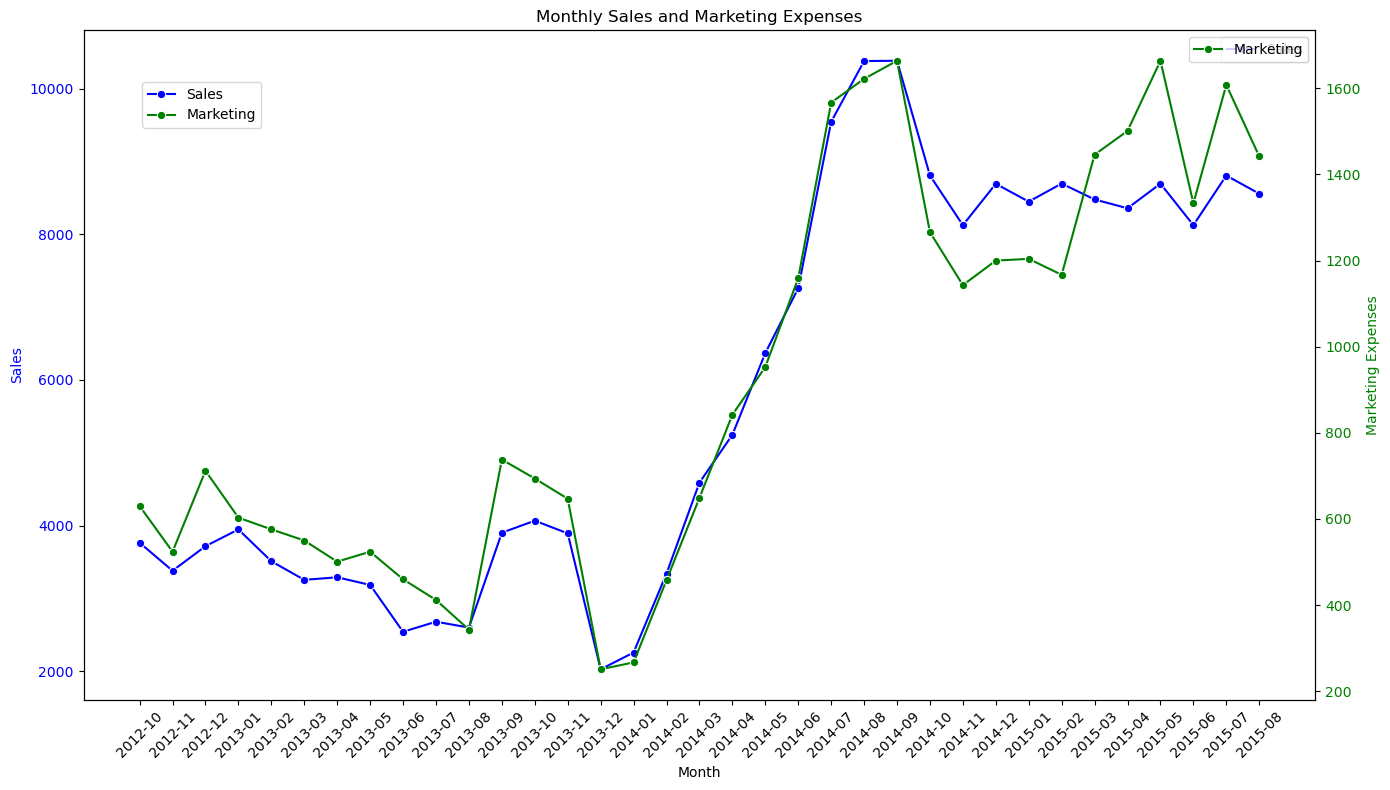

In [89]:
correlation = monthly_sales_marketing['Sales'].corr(monthly_sales_marketing['Marketing'])
print(f"Correlation between Sales and Marketing: {correlation:.2f}")

# יצירת גרף עם שני צירים
fig, ax1 = plt.subplots(figsize=(14, 8))

# ציר ראשון - מכירות
sns.lineplot(data=monthly_sales_marketing, x='YearMonth', y='Sales', ax=ax1, label='Sales', color='b', marker='o')
ax1.set_xlabel('Month')
ax1.set_ylabel('Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.tick_params(axis='x', rotation=45)

# ציר שני - הוצאות על שיווק
ax2 = ax1.twinx()
sns.lineplot(data=monthly_sales_marketing, x='YearMonth', y='Marketing', ax=ax2, label='Marketing', color='g', marker='o')
ax2.set_ylabel('Marketing Expenses', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Monthly Sales and Marketing Expenses')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

## מסקנה  1 - יעילות השיווק והסיבה המרכזית לעלייה במכירות

הניתוח של נתוני המכירות והוצאות השיווק של רשת בתי הקפה מראה קשר חיובי חזק מאוד בין ההוצאות על שיווק לבין המכירות החודשיות, עם ערך קורלציה של 0.97. זה מצביע על כך שהעלייה בהוצאות על שיווק מתואמת כמעט לחלוטין עם עלייה במכירות.


#### תובנות עיקריות:
1. **קשר חיובי חזק**:
   - הקורלציה הגבוהה (0.97) מצביעה על כך שכאשר ההוצאות על שיווק גדלות, גם המכירות גדלות בצורה דומה.


2. **השפעת השיווק על המכירות**:
   - ההשקעה בשיווק היא קריטית להצלחת העסק, ומשפיעה באופן משמעותי על עליית המכירות. 


3. **אסטרטגיה עסקית**:
   - מומלץ להמשיך ולהשקיע בשיווק באופן עקבי, לעקוב אחר ההוצאות וההשפעה שלהן על המכירות, ולהשתמש בנתונים אלה לתכנון קמפיינים שיווקיים עתידיים. כפי שניתן לראות, החלו להשקיע יותר בשיווק מסוף 2013 מה שגרם ל2014 וגם לאחריה למכירות הרבה יותר גבוהות משהיו בעבר.
   

4. **המלצות להמשך**:
   - לבחון את ההשפעה של קמפיינים שונים על המכירות ולבצע אופטימיזציה לתקציב השיווק.
   - להבין אילו קמפיינים ושיטות שיווק הם היעילים ביותר ולהתמקד בהם.
   - לבדוק את ההשפעה של השיווק על פלחים שונים של הלקוחות ועל קטגוריות מוצרים שונות.


#### סיכום:
הקורלציה הגבוהה בין הוצאות השיווק למכירות (0.97) מדגישה את החשיבות הקריטית של השקעה בשיווק להצלחת העסק. תכנון אסטרטגי נכון של תקציב השיווק יכול להוביל להגדלת המכירות ולהצלחת העסק בטווח הארוך.


<div>
<img src="https://raw.githubusercontent.com/NirAvrahamoff/NProject/main/DALL%C2%B7E%202024-06-18%2014.43.55%20-%20the%20exterior%20of%20a%20successful%20and%20beautiful%20cafe%CC%81%20with%20attractive%20outdoor%20seating%2C%20stylish%20design%2C%20vibrant%20atmosphere%2C%20and%20people%20enjoying%20their%20coffee.webp" width="400"/>
</div>

<a id='Subject2'></a>

## Popular and Profitable Products and Regions

Here is a list of the most popular and profitable products and regions in the coffee chain, based on sales and profitability data analysis:

- **Popular Products**: Products with the highest total sales.
- **Profitable Products**: Products with the highest gross profit.
- **Popular Regions**: Regions with the highest total sales.
- **Profitable Regions**: Regions with the highest gross profit.

These products and regions indicate strong categories that deserve more investment and focused marketing campaigns to promote them. Additionally, this analysis helps identify areas and products that require improvement to enhance the overall profitability of the company.


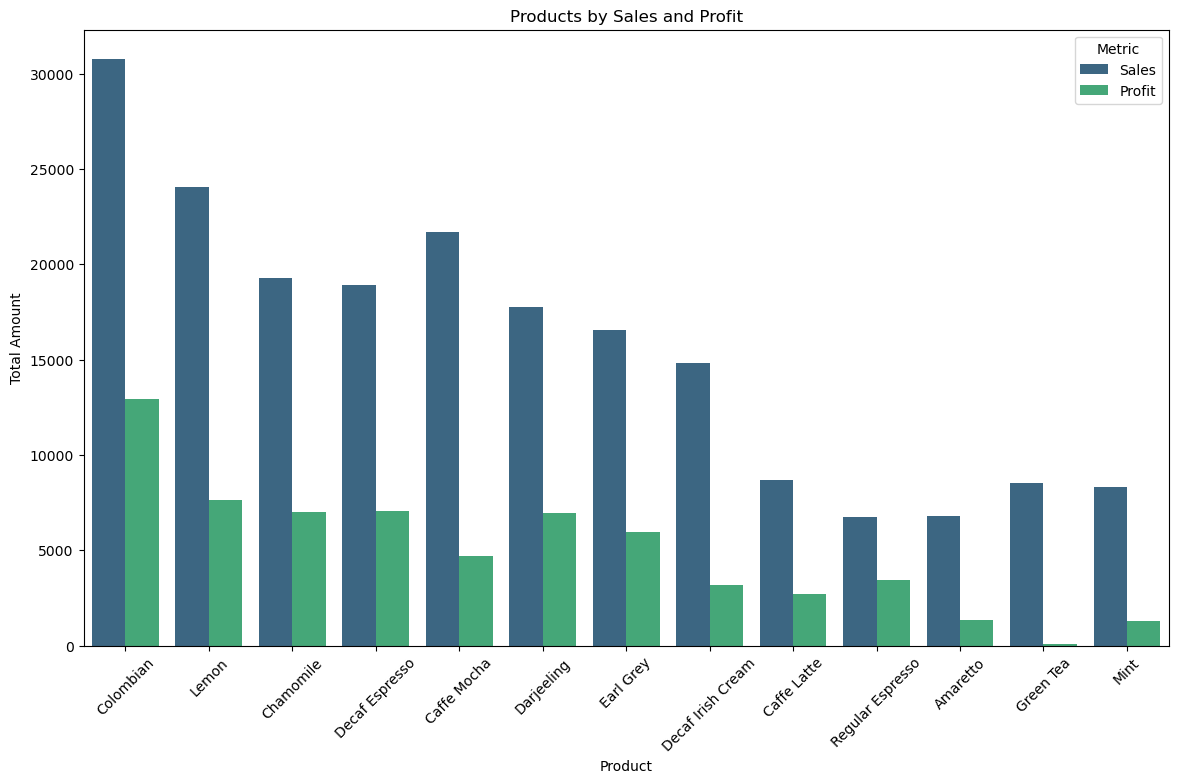

In [90]:
product_analysis = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# דירוג המוצרים לפי מכירות ורווח
product_analysis['Sales_Rank'] = product_analysis['Sales'].rank(ascending=False)
product_analysis['Profit_Rank'] = product_analysis['Profit'].rank(ascending=False)

# חישוב דירוג משולב על ידי חיבור הדירוגים
product_analysis['Combined_Rank'] = product_analysis[['Sales_Rank', 'Profit_Rank']].mean(axis=1)

# מיון המוצרים לפי דירוג משולב בסדר יורד
product_analysis_sorted = product_analysis.sort_values(by='Combined_Rank')

# המרת הנתונים לפורמט ארוך עבור גרף עמודות מוערם
product_analysis_melted = product_analysis_sorted.melt(id_vars='Product', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Amount')

# יצירת גרף עמודות עבור כל המוצרים
plt.figure(figsize=(14, 8))
sns.barplot(data=product_analysis_melted, x='Product', y='Amount', hue='Metric', palette='viridis')
plt.title('Products by Sales and Profit')
plt.xlabel('Product')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()



In [91]:
# חישוב סך המכירות והרווח עבור כל מוצר
product_sales_profit = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# מיון הנתונים בסדר יורד לפי מכירות ורווח
sorted_product_sales_profit = product_sales_profit.sort_values(by=['Sales', 'Profit'], ascending=False).reset_index(drop=True)

# הדפסת הטבלה הממוינת
print(sorted_product_sales_profit)

              Product  Sales  Profit
0           Colombian  30761   12932
1               Lemon  24048    7614
2         Caffe Mocha  21716    4687
3           Chamomile  19295    7006
4      Decaf Espresso  18888    7039
5          Darjeeling  17758    6976
6           Earl Grey  16546    5975
7   Decaf Irish Cream  14831    3201
8         Caffe Latte   8665    2716
9           Green Tea   8520      89
10               Mint   8342    1286
11           Amaretto   6781    1352
12   Regular Espresso   6744    3438


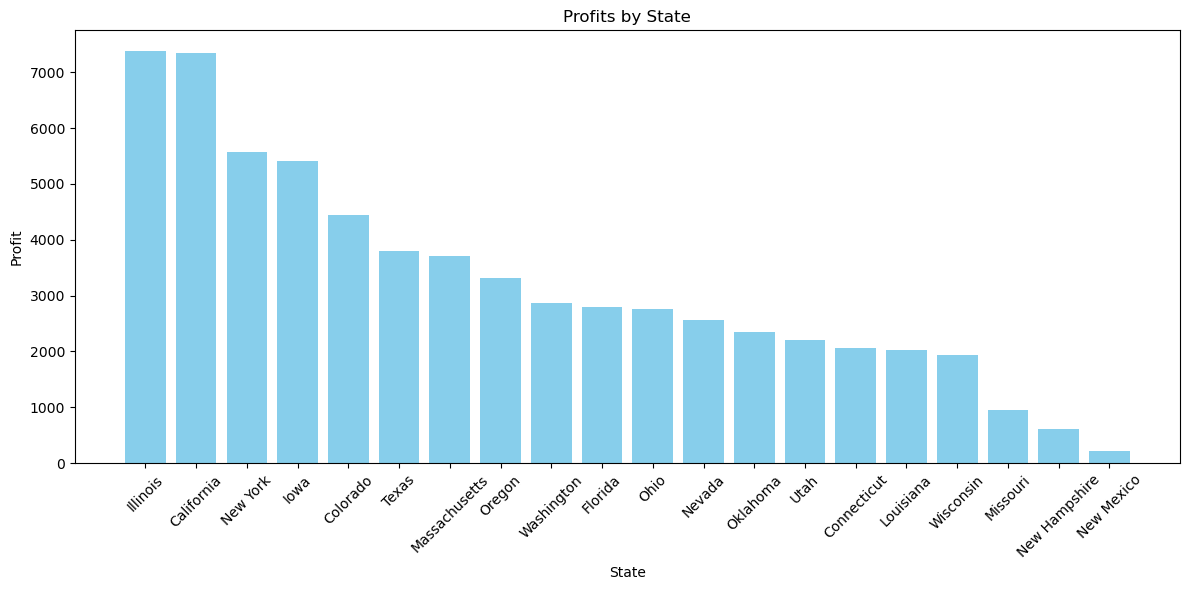

In [92]:

# חישוב סך הרווחים לפי מדינה
profits_by_state = df.groupby('State')['Profit'].sum().reset_index()

# מיון הנתונים לפי רווחים בסדר יורד
profits_by_state_sorted = profits_by_state.sort_values(by='Profit', ascending=False)

# יצירת גרף עמודות המציג את הרווחים לפי מדינה בסדר יורד
plt.figure(figsize=(12, 6))
plt.bar(profits_by_state_sorted['State'], profits_by_state_sorted['Profit'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profits by State')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


            State  Sales  Profit
0      California  23032    7340
1        New York  17731    5565
2        Illinois  16812    7380
3          Nevada  14822    2556
4            Iowa  13359    5412
5        Colorado  12112    4450
6          Oregon  10661    3309
7      Washington   9744    2865
8            Utah   9159    2199
9           Texas   9092    3803
10        Florida   8825    2794
11           Ohio   8787    2766
12      Wisconsin   7839    1937
13  Massachusetts   7339    3710
14       Oklahoma   7298    2351
15    Connecticut   6670    2066
16      Louisiana   6193    2026
17       Missouri   6072     956
18     New Mexico   3805     216
19  New Hampshire   3543     610


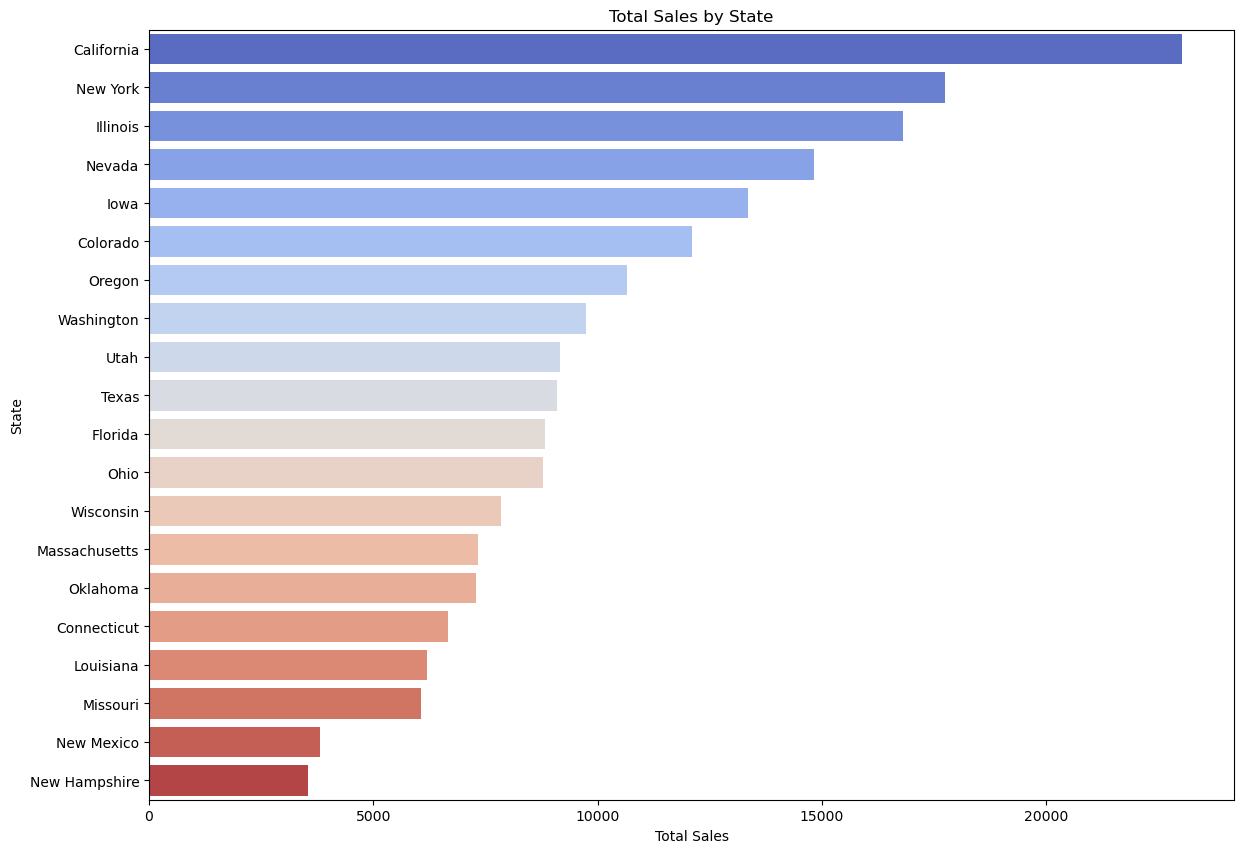

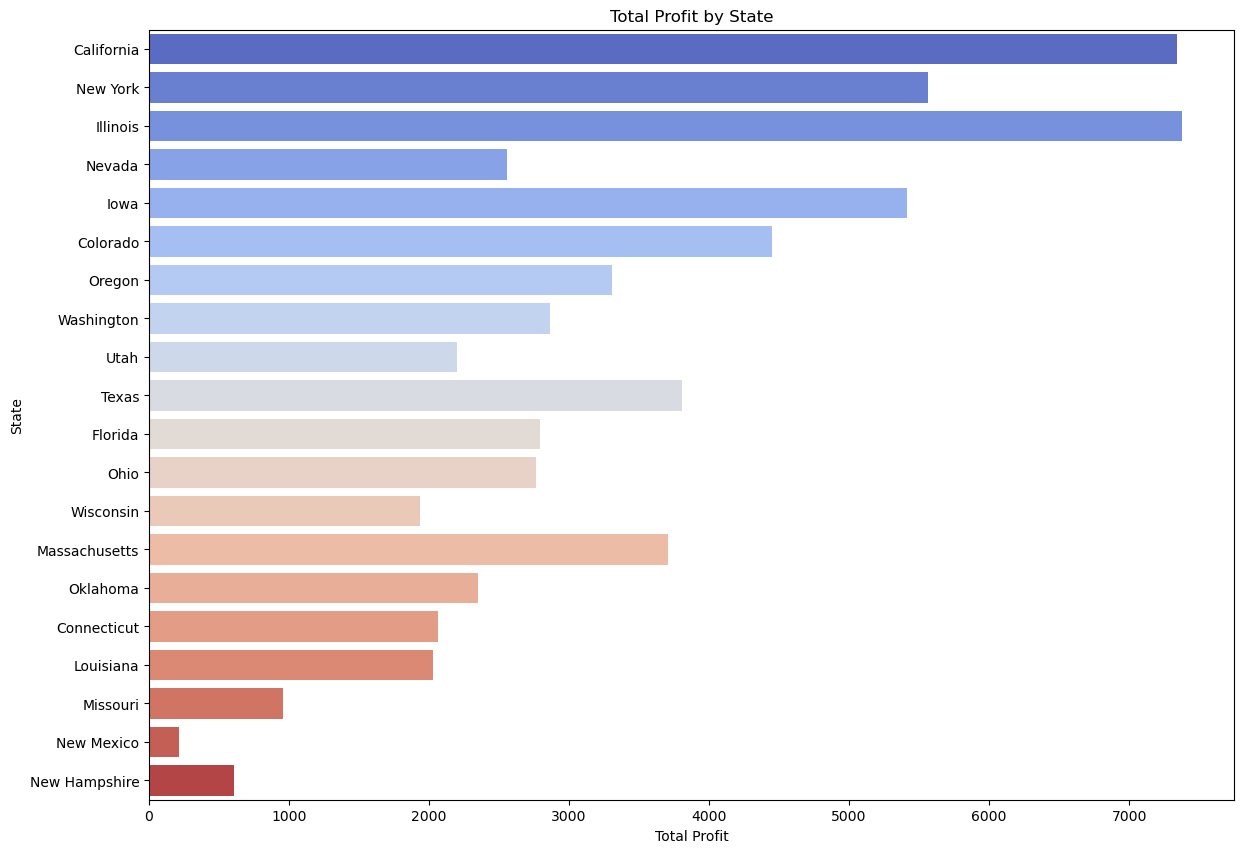

In [93]:

# חישוב סך המכירות והרווח עבור כל מדינה
state_sales_profit = df.groupby('State').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

# מיון הנתונים בסדר יורד לפי מכירות ורווח
sorted_state_sales_profit = state_sales_profit.sort_values(by=['Sales', 'Profit'], ascending=False).reset_index(drop=True)

# הדפסת הטבלה הממוינת
print(sorted_state_sales_profit)

# ויזואליזציה של המכירות והרווח לפי מדינה
plt.figure(figsize=(14, 10))
sns.barplot(x='Sales', y='State', data=sorted_state_sales_profit, palette='coolwarm')
plt.title('Total Sales by State')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

plt.figure(figsize=(14, 10))
sns.barplot(x='Profit', y='State', data=sorted_state_sales_profit, palette='coolwarm')
plt.title('Total Profit by State')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.show()


### מסקנה 2 - ניתוח מכירות ורווחיות של המוצרים והמדינות

#### סיכום הנתונים:
- **מוצרים רווחיים במיוחד**: Colombian, Lemon, Caffe Mocha, Chamomile, Decaf Espresso, Darjeeling, Earl Grey.
- **מוצרים עם מכירות גבוהות ורווחיות נמוכה יחסית**: Green Tea, Mint, Amaretto.
- **מכירות לפי מדינה**: הניתוח מציג את סך המכירות בכל מדינה.

#### מסקנות עבור רווחיות החברה:

1. **השקעה במוצרים הרווחיים**:
   - **Colombian**: מוביל במכירות וברווחיות. כדאי להשקיע במוצר זה להרחיב את הייצור ולהגביר את השיווק.
   - **Lemon**, **Chamomile**, **Decaf Espresso**, **Darjeeling**: מוצרים עם רווחיות גבוהה ומכירות טובות. כדאי להמשיך ולהשקיע בהם, לשפר את הקידום ולהרחיב את השוק.



2. **שיפור הרווחיות במוצרים עם מכירות גבוהות ורווחיות נמוכה יחסית**:
   - **Green Tea**: למרות מכירות טובות, רווחיות נמוכה מאוד. יש לבדוק את עלויות הייצור והשיווק, לשקול שינוי בתמחור או שיפור המוצר.
   - **Mint** ו- **Amaretto**: להוריד עלויות ייצור, לשפר את תהליך השיווק או לבדוק אפשרות להעלאת המחיר לשיפור הרווחיות.



3. **שיפור מוצרים נוספים**:
   - **Caffe Mocha**, **Caffe Latte**, **Regular Espresso**, ו- **Decaf Irish Cream** מציגים רווחיות טובה אך יש מקום לשיפור. כדאי לבדוק את תהליכי הייצור והשיווק ולשקול שיפורים.



4. **מכירות לפי מדינה**:
   - **קליפורניה**: המובילה במכירות. יש להמשיך ולהשקיע במדינה זו, לשפר את הנוכחות בשוק ולהשקיע במוצרי הדגל שמצליחים שם.
   - **מדינות נוספות רווחיות**: טקסס, פלורידה, ואילינוי מציגות גם הן מכירות טובות. כדאי להרחיב את הפעילות במדינות אלו.



5. **שיפור ביצועים במדינות הפחות רווחיות**:
   - **בדיקת אסטרטגיית השיווק**: במדינות עם מכירות נמוכות כדאי לבחון מחדש את האסטרטגיה השיווקית, לשפר את המודעות למותג ולהגביר את הפעילות השיווקית.
   - **התאמת המוצרים לשוק המקומי**: לבדוק אם יש צורך לשנות או להתאים את המוצרים בהתאם להעדפות המקומיות של הצרכנים במדינות הפחות רווחיות.


### החלטה על סגירת העסק:

1. **זיהוי מדינות עם מכירות ורווח נמוכים במיוחד**:
   - **New Mexico** ו- **New Hampshire**: מכירות ורווח נמוכים ביותר. יש לבדוק את האסטרטגיה השיווקית והמבצעים העסקיים במדינות אלו, ואם לא ניתן לשפר את הביצועים, כדאי לשקול סגירת העסק.

2. **בדיקה מעמיקה**:
   - לפני שמחליטים לסגור את העסק במדינה מסוימת, כדאי לבדוק את הסיבות לביצועים הנמוכים. האם יש בעיות שיווקיות? האם המוצרים אינם מתאימים לשוק המקומי? האם יש תחרות קשה?

3. **התייעלות ושיפור**:
   - אם יש פוטנציאל לשיפור, ניתן לבצע התאמות במוצרים, לשפר את השיווק, או לשנות את המודל העסקי במדינות אלו לפני שמחליטים על סגירה.

4. **החלטה על סגירת העסק**:
   - אם לאחר כל הבדיקות והמאמצים לשיפור הביצועים, המדינות כמו Connecticut ממשיכות להציג מכירות ורווחיות נמוכות מאוד, כדאי לשקול ברצינות את סגירת העסק במדינות אלו על מנת למנוע הפסדים נוספים ולהתמקד באזורים רווחיים יותר.


<a id='Subject3'></a>

## TARGET vs REALLTY
נבחן האם החיזוי והיעדים שהציבו היו ראליים, האם עמדו בהם ועשו עבודה ניהולית איכותית וטובה או  שלא עמדו ביעדים שהציבו לעצמה והפן הניהולי הכולל חיזוי והצבת יעדים דרוש שיפור

---
## <blockquote>  numeric columns </blockquote>


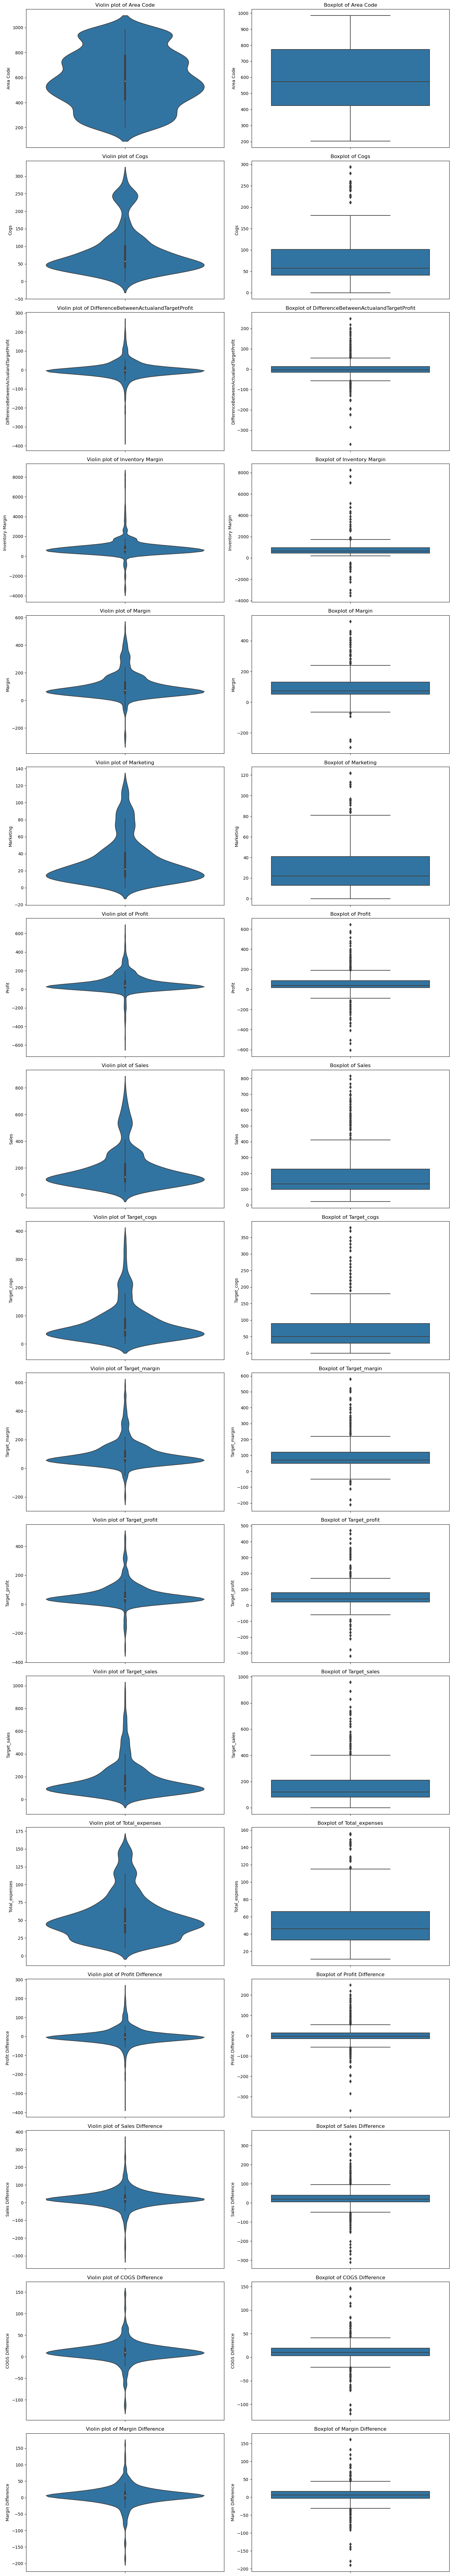

In [94]:
numeric_columns = get_numeric_columns(df)
plot_numeric_columns(df, numeric_columns)

החיזוי למכירות, לעלויות המוצרים, לרווח ולמרווחים מצביע על שונות גבוהה וסטיות משמעותיות מהערכים המתוכננים, מה שמצביע על צורך בשיפור החיזוי.

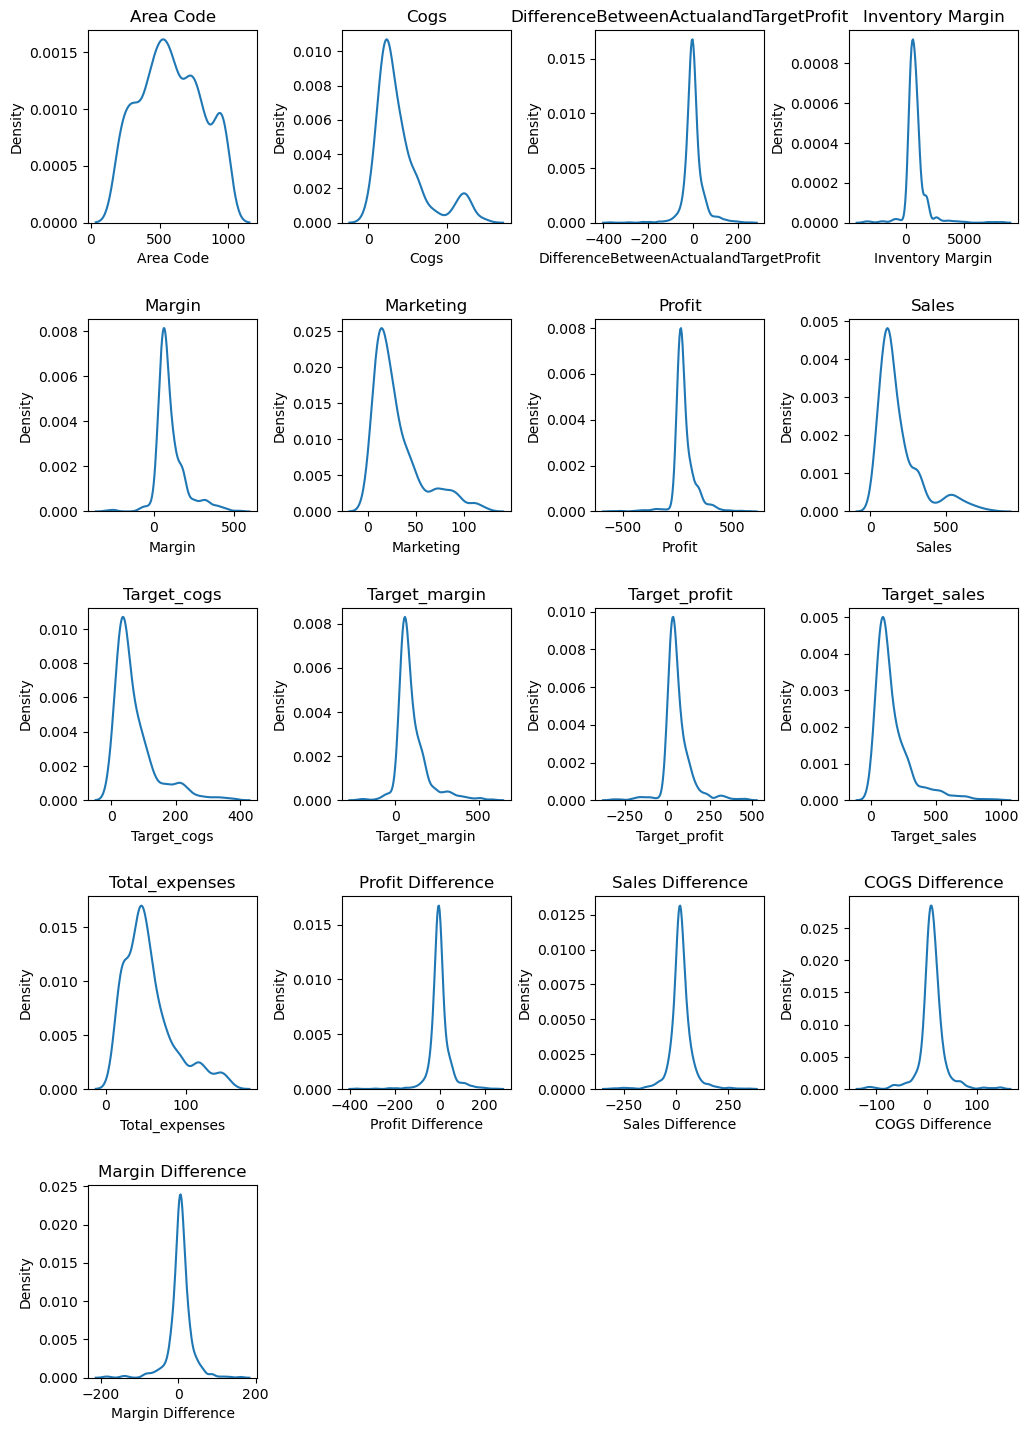

In [95]:

# נניח שיש לך DataFrame בשם df והעמודות המספריות
features = numeric_columns

# הגדרת תצורה של הגרפים
num_features = len(features)
rows = (num_features // 4) + (num_features % 4 > 0)  # חישוב מספר השורות הדרושות
cols = 4

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, rows * 3.5))
axes = axes.flatten()

# יצירת גרפי צפיפות עבור כל עמודה
for i, feature in enumerate(features):
    sns.kdeplot(df[feature], ax=axes[i])
    axes[i].set_title(feature)

# הסרת צירים מיותרים
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

# התאמת הרווחים בין הגרפים
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# הצגת הגרפים
plt.show()


# תת מסקנה מהתפלגויות התחזיות

## Target_cogs
התפלגות צרה וממוקדת עם זנב ארוך ימינה עשויה להצביע על כך שישנם מקרים בודדים של עלויות גבוהות שאינן נלקחות בחשבון באופן מדויק.

## Target_margin
התפלגות רחבה עם זנבות בשני הצדדים עשויה להצביע על כך שיש שונות גבוהה במרווחים המתוכננים .

## Target_profit
התפלגות צרה אך עם זנב ימני משמעותי עשויה להצביע על כך שהחיזוי לרווחים גבוהים אינו מדויק ויש צורך בשיפור המודל.

## Target_sales
התפלגות צרה וממוקדת עם זנב ארוך ימינה עשויה להצביע על כך שהחיזוי למכירות גבוהות אינו מדויק ויש צורך בשיפור המודל.

# סיכום
ההתפלגות הלא נורמלית של התחזיות מצביעה על כך שיש צורך בשיפור מודלי החיזוי כדי להגיע לתוצאות מדויקות יותר.


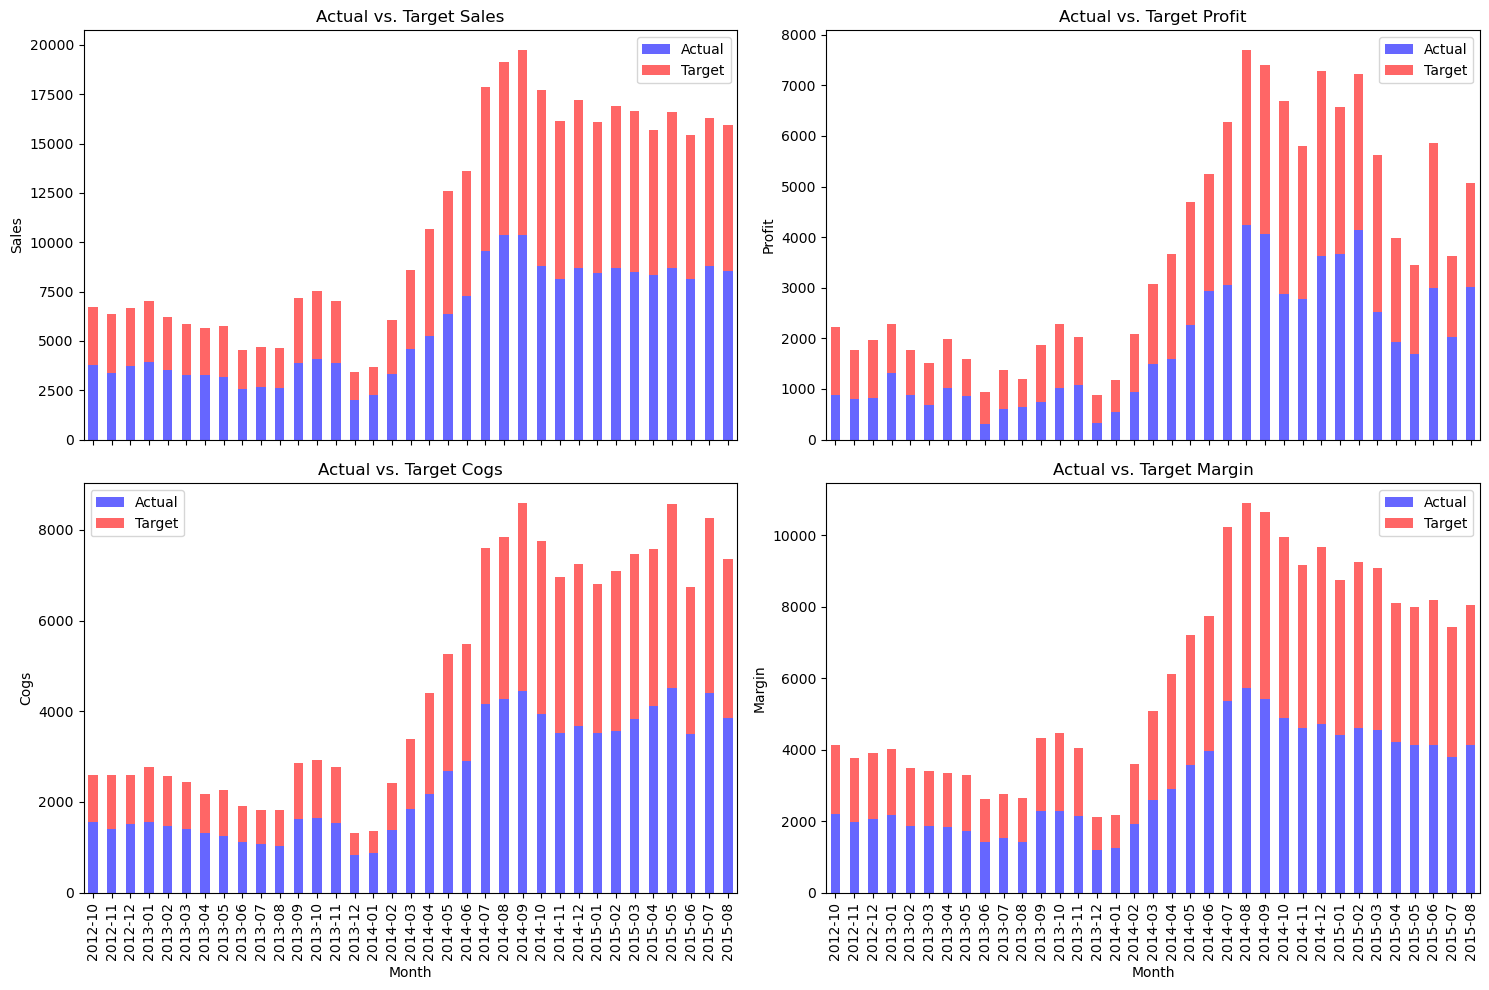

In [113]:
# Summarize the data on a monthly basis for numeric columns
df['Month'] = df['Date'].dt.to_period('M')
numeric_columns = ['Sales', 'Profit', 'Cogs', 'Margin', 'Target_sales', 'Target_profit', 'Target_cogs', 'Target_margin']
monthly_data = df.groupby('Month')[numeric_columns].sum().reset_index()

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True)

# Create a function to plot stacked bars
def plot_stacked_bars(ax, actual, target, title, ylabel):
    df_plot = pd.DataFrame({
        'Month': monthly_data['Month'].astype(str),
        'Actual': actual,
        'Target': target
    })
    df_plot.set_index('Month', inplace=True)
    df_plot.plot(kind='bar', stacked=True, ax=ax, color=['blue', 'red'], alpha=0.6)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.legend(['Actual', 'Target'])
    ax.tick_params(axis='x', rotation=90)

# Plot Sales
plot_stacked_bars(axes[0, 0], monthly_data['Sales'], monthly_data['Target_sales'], 'Actual vs. Target Sales', 'Sales')

# Plot Profit
plot_stacked_bars(axes[0, 1], monthly_data['Profit'], monthly_data['Target_profit'], 'Actual vs. Target Profit', 'Profit')

# Plot Cogs
plot_stacked_bars(axes[1, 0], monthly_data['Cogs'], monthly_data['Target_cogs'], 'Actual vs. Target Cogs', 'Cogs')

# Plot Margin
plot_stacked_bars(axes[1, 1], monthly_data['Margin'], monthly_data['Target_margin'], 'Actual vs. Target Margin', 'Margin')

# Adjust layout
plt.tight_layout()
plt.show()

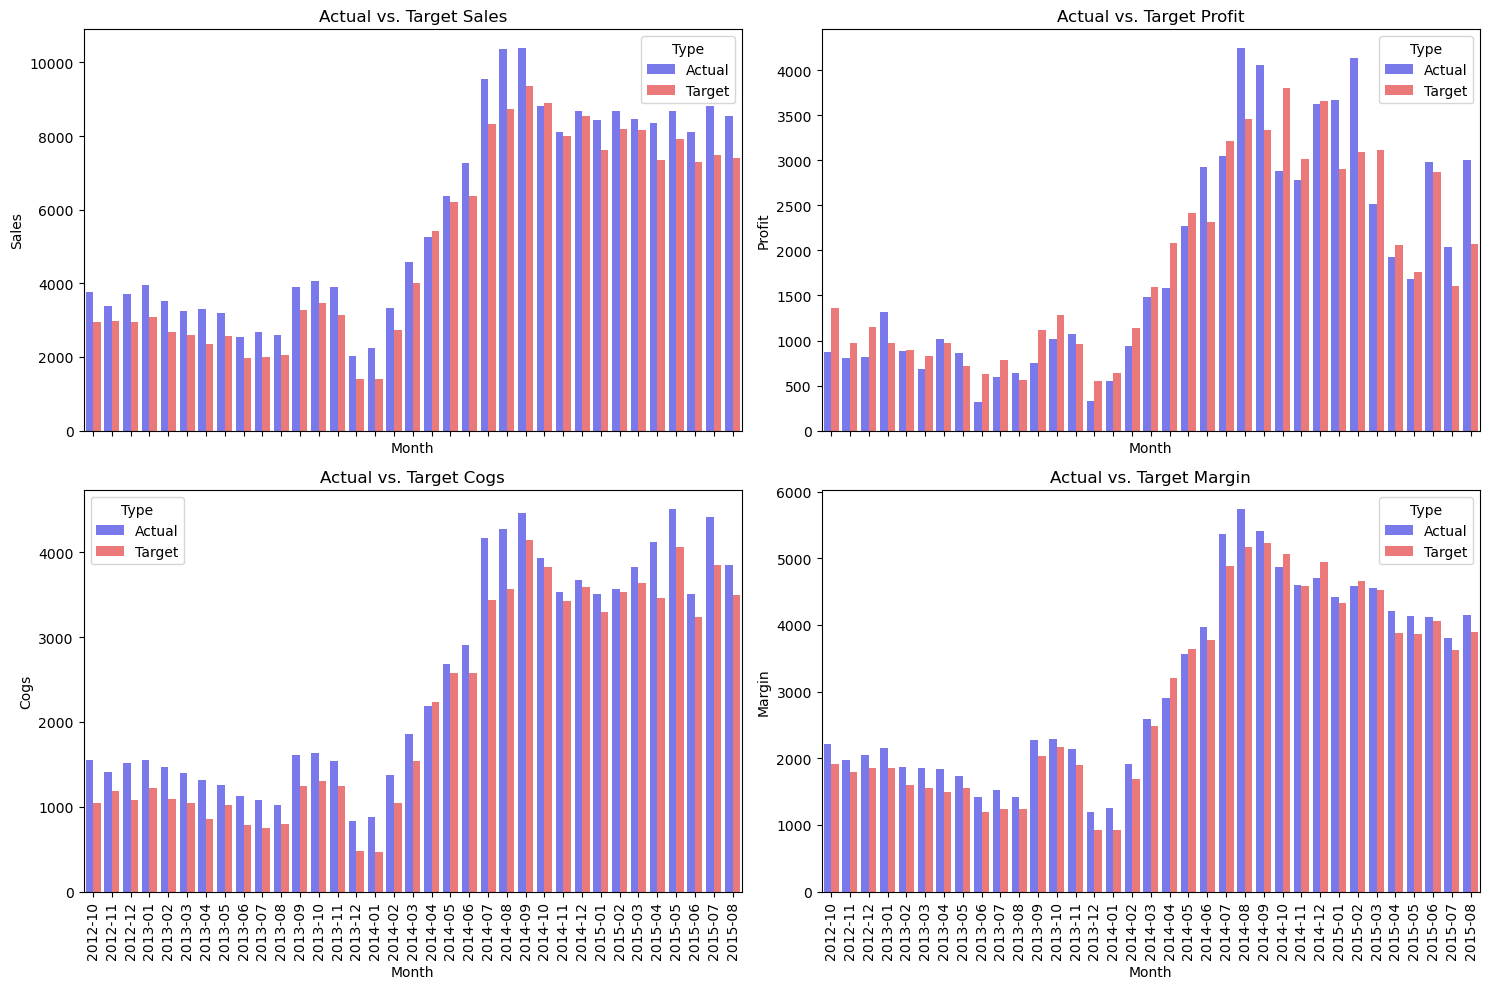

In [112]:

# Summarize the data on a monthly basis for numeric columns
df['Month'] = df['Date'].dt.to_period('M')
numeric_columns = ['Sales', 'Profit', 'Cogs', 'Margin', 'Target_sales', 'Target_profit', 'Target_cogs', 'Target_margin']
monthly_data = df.groupby('Month')[numeric_columns].sum().reset_index()

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharex=True)

# Create a function to plot stacked bars using Seaborn
def plot_stacked_bars(ax, actual, target, title, ylabel):
    df_plot = pd.DataFrame({
        'Month': monthly_data['Month'].astype(str),
        'Actual': actual,
        'Target': target
    }).melt(id_vars='Month', var_name='Type', value_name='Value')
    sns.barplot(data=df_plot, x='Month', y='Value', hue='Type', ax=ax, palette=['blue', 'red'], alpha=0.6)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.legend(title='Type')
    ax.tick_params(axis='x', rotation=90)

# Plot Sales
plot_stacked_bars(axes[0, 0], monthly_data['Sales'], monthly_data['Target_sales'], 'Actual vs. Target Sales', 'Sales')

# Plot Profit
plot_stacked_bars(axes[0, 1], monthly_data['Profit'], monthly_data['Target_profit'], 'Actual vs. Target Profit', 'Profit')

# Plot Cogs
plot_stacked_bars(axes[1, 0], monthly_data['Cogs'], monthly_data['Target_cogs'], 'Actual vs. Target Cogs', 'Cogs')

# Plot Margin
plot_stacked_bars(axes[1, 1], monthly_data['Margin'], monthly_data['Target_margin'], 'Actual vs. Target Margin', 'Margin')

# Adjust layout
plt.tight_layout()
plt.show()


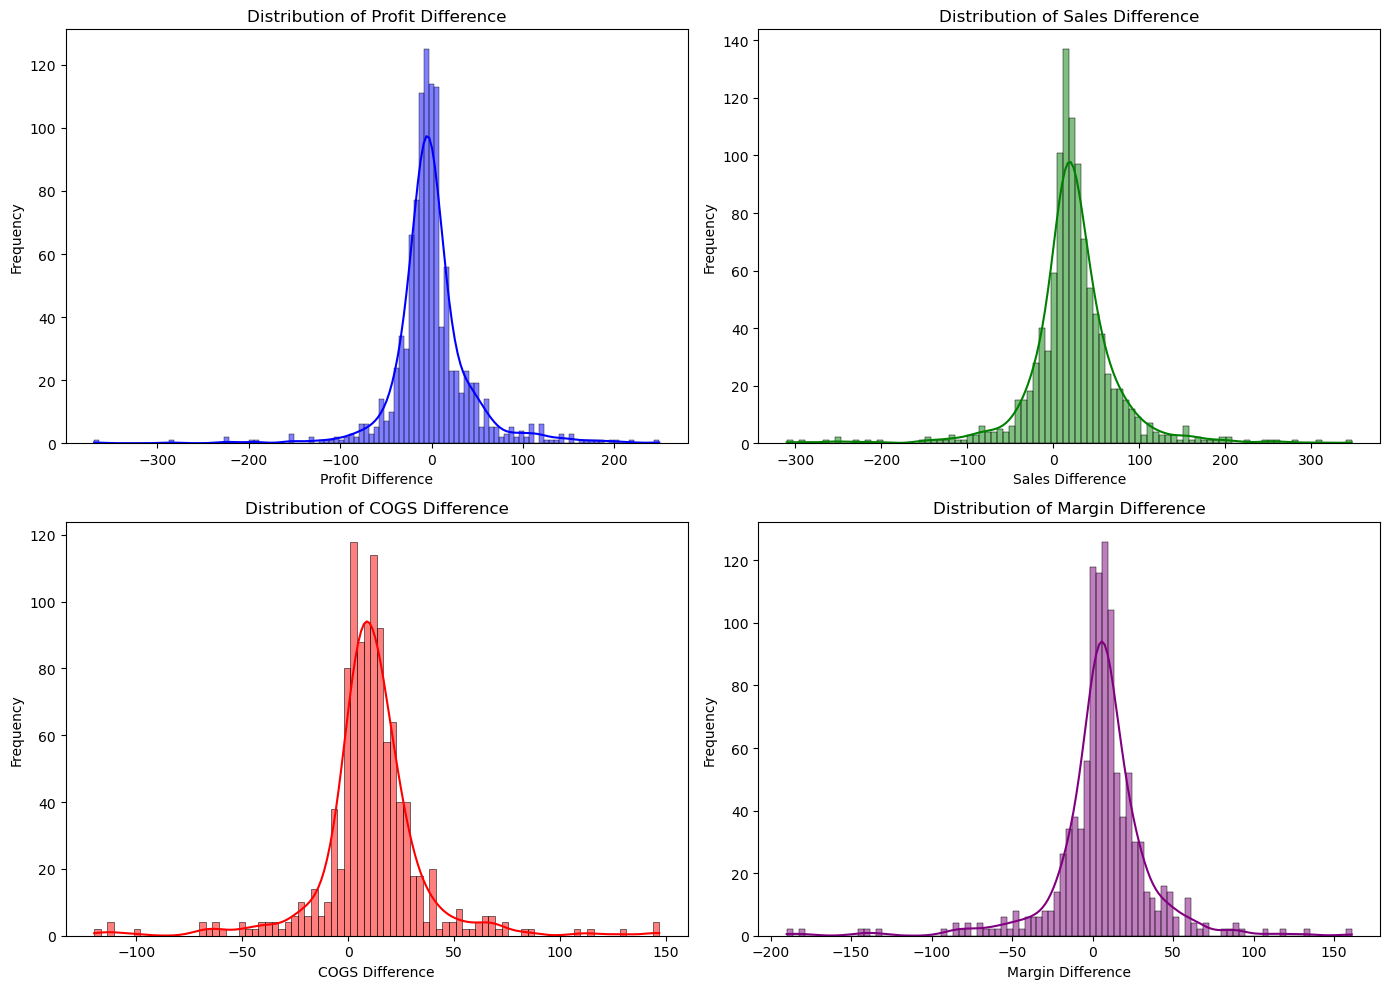

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create new columns to compare actual vs target
df['Profit Difference'] = df['Profit'] - df['Target_profit']
df['Sales Difference'] = df['Sales'] - df['Target_sales']
df['COGS Difference'] = df['Cogs'] - df['Target_cogs']
df['Margin Difference'] = df['Margin'] - df['Target_margin']

# Plotting
plt.figure(figsize=(14, 10))

# Profit Difference
plt.subplot(2, 2, 1)
sns.histplot(df['Profit Difference'], kde=True, color='blue')
plt.title('Distribution of Profit Difference')
plt.xlabel('Profit Difference')
plt.ylabel('Frequency')

# Sales Difference
plt.subplot(2, 2, 2)
sns.histplot(df['Sales Difference'], kde=True, color='green')
plt.title('Distribution of Sales Difference')
plt.xlabel('Sales Difference')
plt.ylabel('Frequency')

# COGS Difference
plt.subplot(2, 2, 3)
sns.histplot(df['COGS Difference'], kde=True, color='red')
plt.title('Distribution of COGS Difference')
plt.xlabel('COGS Difference')
plt.ylabel('Frequency')

# Margin Difference
plt.subplot(2, 2, 4)
sns.histplot(df['Margin Difference'], kde=True, color='purple')
plt.title('Distribution of Margin Difference')
plt.xlabel('Margin Difference')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


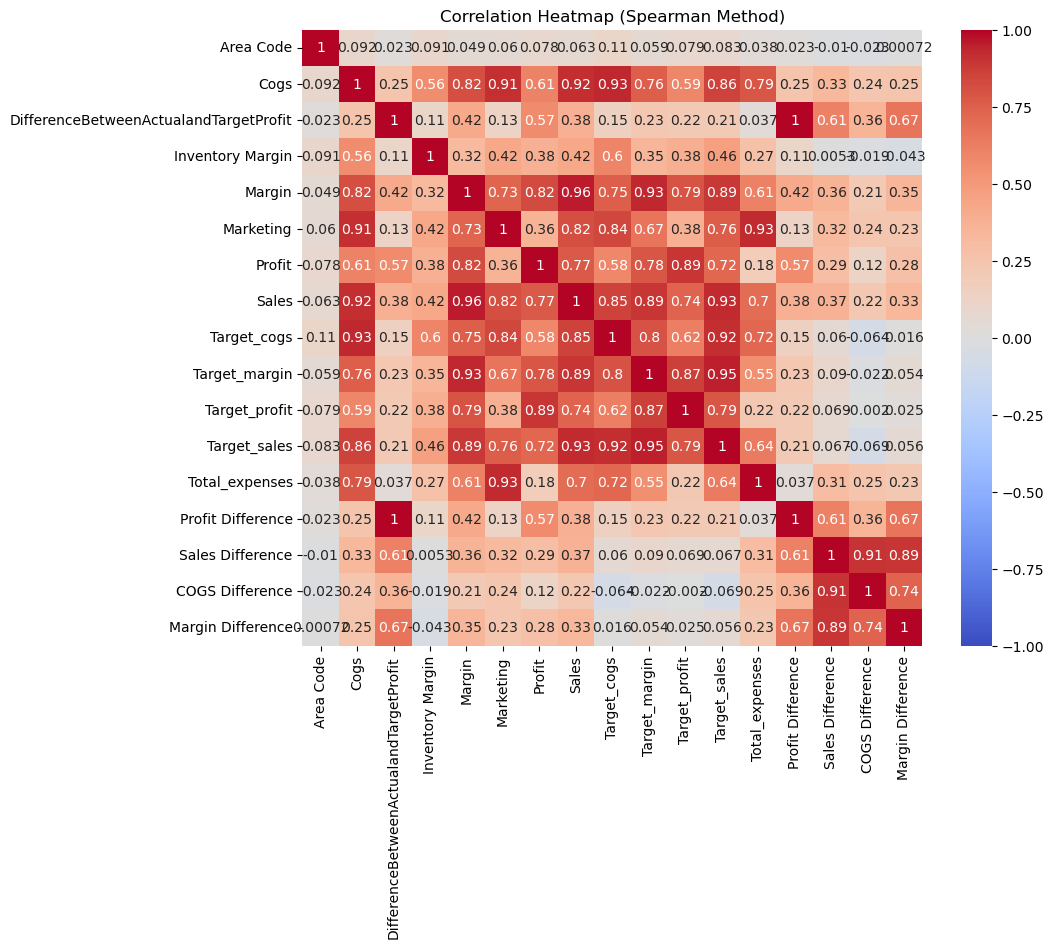

In [107]:
plot_correlation_heatmap(df, features, "spearman")

#  תת מסקנה משולבת ממפת החום והגרפים

למרות שהמתאם הגבוה בין התחזיות לתוצאות בפועל מצביע על קשר דפוסי, הפערים הגדולים המוצגים בגרפים מראים שהתחזיות אינן מדויקות ויש צורך בשיפור המודלים התחזיתיים כדי להתאים טוב יותר למציאות.

המתאם מראה שהתחזיות והתוצאות מתנהגות בצורה דומה, אבל הגרפים מראים שיש פערים גדולים ביניהן. זה אומר שהתחזיות לא מדויקות וצריך לשפר אותן כדי שיתאימו למה שקורה באמת.


# מסקנה 3 - ניתוח ביצועים לעומת יעדים

### מכירות (Sales)
- בחודשים רבים המכירות בפועל נמוכות מהיעד, אך ישנם גם חודשים בהם המכירות עולות על היעד.
- הפערים במכירות מצביעים על כך שייתכן שהיעדים שהוצבו היו שאפתניים מדי או שהתחזיות לא היו מדויקות.
- ישנם חודשים בהם המכירות בפועל נמוכות מהיעדים (העמודות הכחולות נמוכות מהעמודות האדומות).
ישנם גם חודשים בהם המכירות בפועל עולות על היעדים, אך באופן כללי ניתן לראות שיש פערים משמעותיים בחלק מהחודשים.

### רווח (Profit)
- ברוב החודשים הרווח בפועל נמוך מהיעד, מה שמעיד על קושי בעמידה ביעדים הרווחיים.
- יתכן שהוצאות בלתי צפויות או ירידה במכירות השפיעו על הרווחיות.
- הרווח בפועל נמוך מהיעד ברוב החודשים, מה שמעיד על קושי לעמוד ביעדים שהוצבו.
ישנם חודשים עם פערים גדולים במיוחד בין הרווח בפועל ליעדים.

### עלות הסחורה הנמכרת (COGS)
- העלות בפועל נעה סביב היעד בצורה משתנה, ולעיתים גבוהה ולעיתים נמוכה מהיעד.
- הפערים בעלות עשויים להצביע על שינויים בלתי צפויים במחירי חומרי הגלם או בעלויות הייצור.
-בחלק מהחודשים העלות בפועל נמוכה מהיעד, אך ישנם גם חודשים בהם העלות בפועל גבוהה מהיעד.
העלות בפועל אינה יציבה ונעה סביב היעד בצורה משתנה.

### שוליים (Margin)
- השוליים בפועל נמוכים מהיעד בחודשים רבים, מה שמעיד על בעיות בשמירה על הרווחיות הרצויה.
- ייתכן שהשוליים הנמוכים נובעים מהכנסות נמוכות והוצאות גבוהות.
- ישנם פערים משמעותיים בין השוליים בפועל לשוליים שהוצבו כיעד.
בחודשים רבים השוליים בפועל נמוכים מהיעד, מה שעשוי להעיד על בעיות בביצוע או בתחזית.


## מסקנות ופעולות להמשך
- הגרפים המוצגים מראים שבחודשים רבים יש פערים משמעותיים בין הביצועים בפועל לבין היעדים שהוצבו. זה מתיישב עם הגרף שהצגת, שמראה קושי בעמידה ביעדים.

כדי לצמצם את הפערים הללו, כדאי לבחון את הגורמים המשפיעים על ההבדלים ולבצע התאמות בתהליכי התחזיות והביצוע.
- **תחזיות מדויקות יותר**: יש לבחון מחדש את התהליך בו קובעים את היעדים והתחזיות, ולשפר את הדיוק שלהם באמצעות ניתוח נתונים מעמיק יותר והתחשבות במגמות שוק.
- **ניהול הוצאות**: יש לבצע ניתוח מעמיק של ההוצאות ולנסות לצמצם עלויות בלתי צפויות.
- **התאמות תפעוליות**: ייתכן שצריך לבצע התאמות בתהליכי הייצור או ברכש כדי לצמצם את העלויות ולהגביר את הרווחיות.
- **מעקב ובקרה שוטפים**: לבצע מעקב ובקרה שוטפים אחר הביצועים ולהשוות אותם ליעדים כדי לאתר בעיות בזמן אמת ולבצע התאמות נדרשות.

סיכום זה מראה את הצורך בבדיקה מחודשת ושיפור של התהליכים השונים בעסק כדי להשיג ביצועים טובים יותר ולעמוד ביעדים שהוצבו.


# מסקנה 3 - שיפור התחזיות

כדי להסיק האם החיזוי הוא איכותי וטוב או דורש שיפור, יש לבחון את ההתפלגות של הערכים המתוכננים (Target) לעומת הערכים בפועל (Actual). מהגרפים, ניתן לראות שיש שונות גבוהה במספר מדדים, כולל הפרשים משמעותיים בין הערכים המתוכננים לערכים בפועל, דבר שמצביע על כך שהחיזוי דורש שיפור. הנה המסקנות העיקריות מכל מדד:

## מכירות (Sales)
- **מכירות בפועל (Actual Sales)**: ערכים בפועל נמוכים באופן משמעותי מהערכים המתוכננים.
- **תחזית מכירות (Target Sales)**: ערכים מתוכננים גבוהים בהרבה מהערכים בפועל.
- **מסקנה**: החיזוי למכירות אינו מדויק ונוטה לאופטימיות יתר. יש צורך בשיפור המודל לחיזוי מכירות מדויק יותר.

## רווח (Profit)
- **רווח בפועל (Actual Profit)**: ערכים בפועל נמוכים באופן משמעותי מהערכים המתוכננים.
- **תחזית רווח (Target Profit)**: ערכים מתוכננים גבוהים בהרבה מהערכים בפועל.
- **מסקנה**: החיזוי לרווח גם כן אינו מדויק ונוטה להערכת יתר. יש צורך בשיפור המודל לחיזוי רווחים מדויק יותר.

## עלות המוצרים שנמכרו (Cogs)
- **עלות בפועל (Actual Cogs)**: ערכים בפועל נמוכים מהערכים המתוכננים.
- **תחזית עלות (Target Cogs)**: ערכים מתוכננים גבוהים בהרבה מהערכים בפועל.
- **מסקנה**: החיזוי לעלות המוצרים שנמכרו אינו מדויק וכולל הערכות יתר. יש צורך בשיפור המודל לחיזוי עלויות מדויק יותר.

## מרווח (Margin)
- **מרווח בפועל (Actual Margin)**: ערכים בפועל נמוכים מהערכים המתוכננים.
- **תחזית מרווח (Target Margin)**: ערכים מתוכננים גבוהים בהרבה מהערכים בפועל.
- **מסקנה**: החיזוי למרווח אינו מדויק וכולל הערכות יתר. יש צורך בשיפור המודל לחיזוי מרווחים מדויק יותר.

## לסיכום
הגרפים מראים בבירור את ההבדלים בין הערכים בפועל לערכים המתוכננים, ומצביעים על כך שהחיזויים הנוכחיים אינם מדויקים ונוטים לאופטימיות יתר. השונות הגבוהה והסטיות הגדולות בין הערכים המתוכננים לערכים בפועל מדגישים את הצורך בשיפור המודלים לחיזוי כדי להגיע לתוצאות מדויקות יותר.


<div>
<img src="https://raw.githubusercontent.com/NirAvrahamoff/NProject/main/DALL%C2%B7E%202024-06-18%2013.57.31%20-%20celebration%20at%20a%20cafe%CC%81%2C%20people%20happy%20and%20cheering%2C%20decorations%2C%20balloons%2C%20modern%20and%20stylish%20decor%2C%20baristas%20and%20customers%20celebrating%20successful%20sales.webp" width="400"/>
</div>

---
## <blockquote> 'Cogs' </blockquote>


In [29]:
### COGS (Cost of Goods Sold): The total cost incurred by the coffee chain in producing or purchasing the products it sells.

In [30]:
df['Cogs'].isnull().sum()

0

In [31]:
df['Cogs'].unique()

array([ 51,  52,  43,  38,  72,   0,  47,  27,  31,  40,  49,  45,  60,
        34,  54,  48,  82,  91,  50,  75,  46,  55,  57,  36,  33,  44,
        53,  61,  65,  80,  41,  39,  92,  68,  63,  76,  22,  23,  79,
        28,  32,  69,  86,  24,  35,  29,  30,  56,  59,  67,  21,  25,
        15,  16,  20, 239, 123,  90, 103,  96, 225, 118,  78,  88, 102,
       101,  94, 241,  81, 134, 105, 125, 130, 115, 260, 161, 255, 108,
        77, 249, 121, 181, 211, 245,  83, 279, 135, 153, 250, 294, 122,
       154, 257,  10, 113, 173, 228, 127, 224, 247])

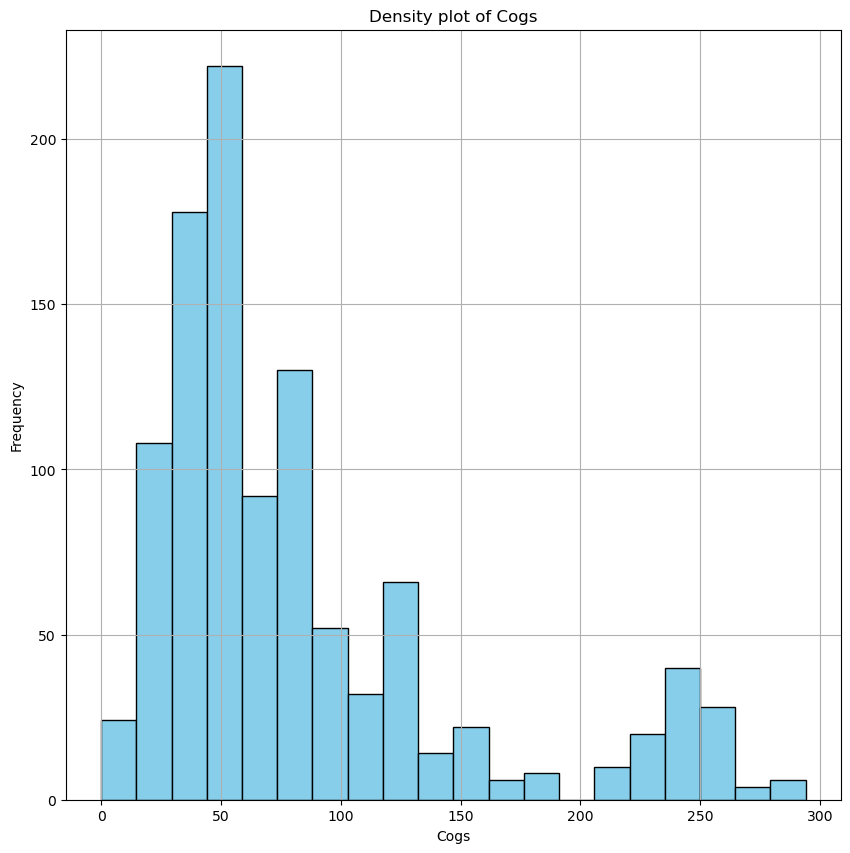

In [32]:
plt.figure(figsize=(10, 10))
plt.hist(df['Cogs'], bins=20, color='skyblue', edgecolor='black')
plt.title('Density plot of Cogs')
plt.xlabel('Cogs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

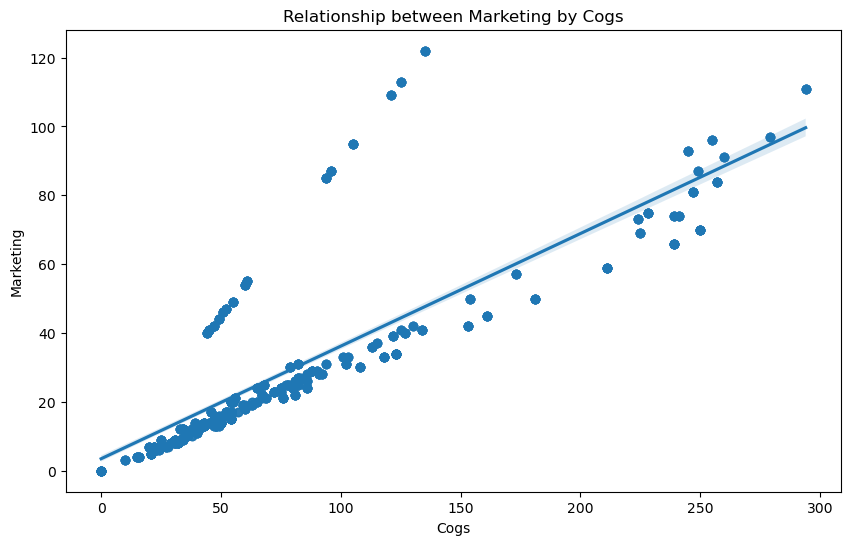

In [33]:
plot_regplot(df, 'Cogs', 'Marketing')

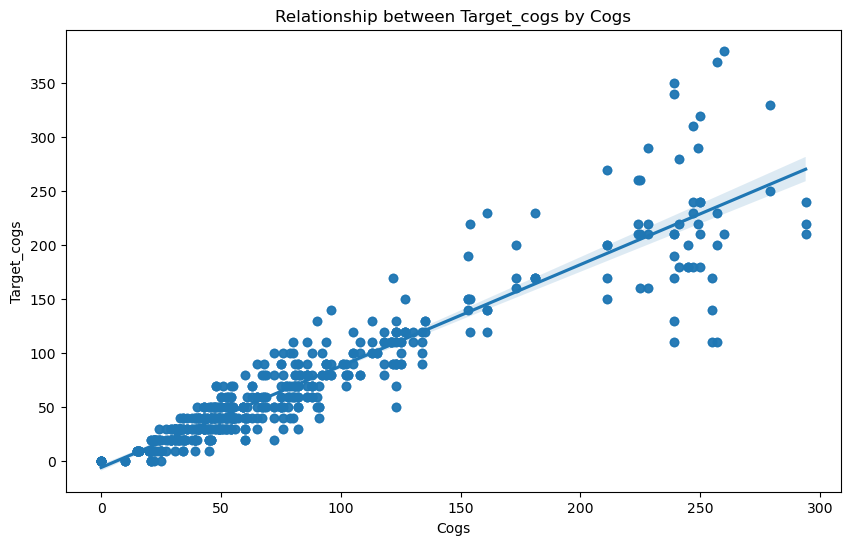

In [34]:
plot_regplot(df, 'Cogs', 'Target_cogs')